# MSDS 430 Milestone 1

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this first milestone we will begin working toward the final project for this course. You should begin by finding a data set that contains data you find interesting. You can find some inspiration and data sets on Kaggle.com or through the university library. Keep in mind that you cannot duplicate what's been done on Kaggle (or anywhere else) for your own project, but you can choose your data set from there or at least get ideas. You will need to also import numpy, matplotlib, and pandas at the very least for this assignment. Feel free to import any other libraries you find necessary.  </font>

Step 1 (5 pts.): Explain your plans for the final project.

## UFC Data Set Comparison ##

My company has some data and does data science related projects, but I can't use it since it's classified. So I've found data on UFC (mixed martial arts / cagefighting) matches on Kaggle. This is interesting to me because I watch this sport sometimes, and it seems extremely unpredictable, more so than another sport like baseball or football. In baseball or football or another popular sport the game is a set time interval and will end at a set time. Also past performance is usually a good predictor of future performance in these sports since they are team sports. in mixed martial arts these types of matches can end at any time and very unpredictably. Past performance doesn't seem to matter since it's an individual sport. Also "mistakes" by one person can lead to them losing a match quickly if the other person capatalizes on it. So I want to find out if _any_ correlation exists between a fighters performance or statistics and maybe compare it to future performance. My calculations will be guesses and I will need some direction on if what I'm trying is useful or not.

1. I would like to run the data to determine which fighters have won the most by a certain method (judges decision, KO, or submission).

2. I would like to determine which fighters have the most loses by a certain method

3. I would like to see the average amount of rounds each fighter fights and who, on average, fights the most rounds.

4. I would like to see the average round a fighter loses in, and the average round a fighter wins in.

5. I would then like to determine the stats around strikes landed information vs KO wins and successful grappling information vs submission wins.

6. I would then like to determine if the amount of strikes or grappling attempted and not landed had any correlation to loss.

7. I would like to see if younger age is an advantage to win

8. I would like to see if taller height is an advantage to win

9. I would like to graph all of the things mentioned using matplotlib


Then I would like to create a function that would grab two fighters randomly, and compare these stats to attempt to predict who may win if they fought each other. I haven't worked out the exact details of how I would compare these yet. These would probably just be simple comparisons. At some point I would need to create another .csv file for the comparison.

Step 2 (5 pts.): Read in your data file and use pandas to inspect the first 5 lines and the last 5 lines.

In [2]:
import pandas as pd
# Read in the csv file.
ufc_data = pd.read_csv('UFC_Rounds.csv')
# Create a custom list of the first five and last five row numbers in the file.
first_last = [0,1,2,3,4] + [x for x in range(len(ufc_data) -1, len(ufc_data) -6, -1)]
# Display data for these rows.
ufc_data.iloc[first_last]


,Id,Date,Event_ID,Fight_ID,winby,winner,corner,Last_round,Max_round,Prev,...,Round5_TIP_Distance Time,Round5_TIP_Ground Control Time,Round5_TIP_Ground Time,Round5_TIP_Guard Control Time,Round5_TIP_Half Guard Control Time,Round5_TIP_Misc. Ground Control Time,Round5_TIP_Mount Control Time,Round5_TIP_Neutral Time,Round5_TIP_Side Control Time,Round5_TIP_Standing Time
0,0,2017-04-15,816,6627,DEC,blue,blue,3,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017-04-15,816,6545,DEC,blue,blue,3,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2017-04-15,816,6547,KO/TKO,red,blue,3,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2017-04-16,816,6589,DEC,blue,blue,3,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2017-04-15,816,6546,DEC,red,blue,3,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,2953,2014-02-03,646,4658,DEC,blue,blue,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,2952,2014-02-03,646,4605,DEC,red,blue,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,2951,2014-02-03,646,4580,DEC,blue,blue,3,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2950,2950,2014-02-03,646,4590,KO/TKO,red,red,1,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,2949,2014-02-03,646,4590,KO/TKO,red,blue,1,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 3 (5 pts.): Use numpy to perform a few calculations relevant to your goals for the final project. Explain each calculation by including comments within your code.

In [27]:
import numpy as np
import pprint

# Attempt to use numpy to sort by age
# Makes a new numpy array
fields = ufc_data.dtypes
ufc_np = np.array(ufc_data, dtype=fields)
# np.argsort(ufc_np, order="Age")

# ^^^^^^^^^^^^
# I can't sort fields because I get an error
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.argsort.html
# ^^ is not helpful
# I can do everything with DataFrames and Series
# I use np.zeros() down there and further down I'm using np.arange()

# Get the most wins, including id, name, and win type
wins_series = ufc_data[["Name", "winby"]].groupby(["Name", "winby"]).size()

# Create a map that will be used to loop through the items
# And track most wins by type
win_types = {}

# Loop through data and create dictionary mapping
for record in wins_series.iteritems():        
    # First item is a tuple with name and win type
    win_type = record[0][1]
    # Get win type listings, for some reason there are 0s in the data
    if win_type != '0':
        # Get the wins type dict for this win type, or create a new one
        win_types[win_type] = win_types.get(win_type, {})
        # Name is in the first item of the tuple
        name = record[0][0]
        # Get the current wins (or set to 0) then increment
        win_types[win_type][name] = win_types[win_type].get(name, 0)
        win_types[win_type][name] = win_types[win_type][name] + record[1]
        
# Convert each of the win types to a Series, and get top 10 in each category.
for win_type in win_types:
    # Convert to series.
    series = pd.Series(win_types[win_type])
    # Sort and get top ten entries.
    win_types[win_type] = series.sort_values(ascending=False)[:11]
    
# This data needs to be moved around before it can be plotted
# Create a new mapping of fighter names : list. This is for plotting in the bar graph.
all_fighters = {}

for key in win_types.keys():
    for fighter_record in win_types[key].iteritems():        
        # Fighter name is first item in the tuple.
        name = fighter_record[0] 
        # Set name and an empty array of 0s for this fighter.
        all_fighters[fighter_record[0]] = np.zeros(3)

# Add win typer entries for each fighter to their array.
# This is because the bar chart needs equally shaped arrays
# For each fighter even if the entry for a win type is 0.
for fighter in all_fighters:
    # Index for tracking placement in fighter win type array
    index = 0
    
    for key in win_types.keys():       
        # Keep track of wether the fighters name was found in the win type
        # object. It may not be, then if not, there needs to be a 0 entry added for that win type
        # in the fighters win types array.
        found = False       
        
        for item in win_types[key].iteritems():
            # Item is a tuple that looks like ("Name", "# of wins")
            fighter_name = item[0] 
            fighter_wins = item[1]
            # Record of this currently iterated fighter found, add it to their win types array
            # and mark as found.
            if fighter == item[0]:
                all_fighters[fighter][index] = item[1]
                found = True
        
        index += 1        

ValueError: Some errors were detected !
    Line #1 (got 453 columns instead of 1434)
    Line #2 (got 455 columns instead of 1434)
    Line #3 (got 455 columns instead of 1434)
    Line #4 (got 455 columns instead of 1434)
    Line #5 (got 453 columns instead of 1434)
    Line #6 (got 455 columns instead of 1434)
    Line #7 (got 454 columns instead of 1434)
    Line #8 (got 453 columns instead of 1434)
    Line #9 (got 455 columns instead of 1434)
    Line #10 (got 455 columns instead of 1434)
    Line #11 (got 455 columns instead of 1434)
    Line #12 (got 455 columns instead of 1434)
    Line #13 (got 455 columns instead of 1434)
    Line #14 (got 455 columns instead of 1434)
    Line #15 (got 455 columns instead of 1434)
    Line #16 (got 455 columns instead of 1434)
    Line #17 (got 455 columns instead of 1434)
    Line #18 (got 455 columns instead of 1434)
    Line #19 (got 455 columns instead of 1434)
    Line #20 (got 455 columns instead of 1434)
    Line #21 (got 455 columns instead of 1434)
    Line #22 (got 455 columns instead of 1434)
    Line #23 (got 453 columns instead of 1434)
    Line #24 (got 453 columns instead of 1434)
    Line #25 (got 454 columns instead of 1434)
    Line #26 (got 455 columns instead of 1434)
    Line #27 (got 454 columns instead of 1434)
    Line #28 (got 455 columns instead of 1434)
    Line #29 (got 455 columns instead of 1434)
    Line #30 (got 453 columns instead of 1434)
    Line #31 (got 455 columns instead of 1434)
    Line #32 (got 455 columns instead of 1434)
    Line #33 (got 454 columns instead of 1434)
    Line #34 (got 455 columns instead of 1434)
    Line #35 (got 455 columns instead of 1434)
    Line #36 (got 453 columns instead of 1434)
    Line #37 (got 455 columns instead of 1434)
    Line #38 (got 455 columns instead of 1434)
    Line #39 (got 455 columns instead of 1434)
    Line #40 (got 455 columns instead of 1434)
    Line #41 (got 454 columns instead of 1434)
    Line #42 (got 455 columns instead of 1434)
    Line #43 (got 455 columns instead of 1434)
    Line #44 (got 454 columns instead of 1434)
    Line #45 (got 455 columns instead of 1434)
    Line #46 (got 455 columns instead of 1434)
    Line #47 (got 455 columns instead of 1434)
    Line #48 (got 455 columns instead of 1434)
    Line #49 (got 453 columns instead of 1434)
    Line #50 (got 453 columns instead of 1434)
    Line #51 (got 455 columns instead of 1434)
    Line #52 (got 454 columns instead of 1434)
    Line #53 (got 454 columns instead of 1434)
    Line #54 (got 455 columns instead of 1434)
    Line #55 (got 453 columns instead of 1434)
    Line #56 (got 453 columns instead of 1434)
    Line #57 (got 455 columns instead of 1434)
    Line #58 (got 454 columns instead of 1434)
    Line #59 (got 455 columns instead of 1434)
    Line #60 (got 455 columns instead of 1434)
    Line #61 (got 453 columns instead of 1434)
    Line #62 (got 453 columns instead of 1434)
    Line #63 (got 454 columns instead of 1434)
    Line #64 (got 454 columns instead of 1434)
    Line #65 (got 454 columns instead of 1434)
    Line #66 (got 453 columns instead of 1434)
    Line #67 (got 453 columns instead of 1434)
    Line #68 (got 453 columns instead of 1434)
    Line #69 (got 453 columns instead of 1434)
    Line #70 (got 454 columns instead of 1434)
    Line #71 (got 453 columns instead of 1434)
    Line #72 (got 453 columns instead of 1434)
    Line #73 (got 454 columns instead of 1434)
    Line #74 (got 453 columns instead of 1434)
    Line #75 (got 453 columns instead of 1434)
    Line #76 (got 455 columns instead of 1434)
    Line #77 (got 455 columns instead of 1434)
    Line #78 (got 455 columns instead of 1434)
    Line #79 (got 455 columns instead of 1434)
    Line #80 (got 455 columns instead of 1434)
    Line #81 (got 455 columns instead of 1434)
    Line #82 (got 455 columns instead of 1434)
    Line #83 (got 455 columns instead of 1434)
    Line #84 (got 455 columns instead of 1434)
    Line #85 (got 453 columns instead of 1434)
    Line #86 (got 455 columns instead of 1434)
    Line #87 (got 453 columns instead of 1434)
    Line #88 (got 453 columns instead of 1434)
    Line #89 (got 455 columns instead of 1434)
    Line #90 (got 453 columns instead of 1434)
    Line #91 (got 455 columns instead of 1434)
    Line #92 (got 453 columns instead of 1434)
    Line #93 (got 453 columns instead of 1434)
    Line #94 (got 455 columns instead of 1434)
    Line #95 (got 455 columns instead of 1434)
    Line #96 (got 455 columns instead of 1434)
    Line #97 (got 454 columns instead of 1434)
    Line #98 (got 455 columns instead of 1434)
    Line #99 (got 454 columns instead of 1434)
    Line #100 (got 453 columns instead of 1434)
    Line #101 (got 455 columns instead of 1434)
    Line #102 (got 453 columns instead of 1434)
    Line #103 (got 455 columns instead of 1434)
    Line #104 (got 455 columns instead of 1434)
    Line #105 (got 455 columns instead of 1434)
    Line #106 (got 453 columns instead of 1434)
    Line #107 (got 454 columns instead of 1434)
    Line #108 (got 454 columns instead of 1434)
    Line #109 (got 453 columns instead of 1434)
    Line #110 (got 453 columns instead of 1434)
    Line #111 (got 453 columns instead of 1434)
    Line #112 (got 455 columns instead of 1434)
    Line #113 (got 453 columns instead of 1434)
    Line #114 (got 455 columns instead of 1434)
    Line #115 (got 455 columns instead of 1434)
    Line #116 (got 455 columns instead of 1434)
    Line #117 (got 455 columns instead of 1434)
    Line #118 (got 455 columns instead of 1434)
    Line #119 (got 455 columns instead of 1434)
    Line #120 (got 453 columns instead of 1434)
    Line #121 (got 453 columns instead of 1434)
    Line #122 (got 455 columns instead of 1434)
    Line #123 (got 453 columns instead of 1434)
    Line #124 (got 455 columns instead of 1434)
    Line #125 (got 454 columns instead of 1434)
    Line #126 (got 455 columns instead of 1434)
    Line #127 (got 455 columns instead of 1434)
    Line #128 (got 455 columns instead of 1434)
    Line #129 (got 455 columns instead of 1434)
    Line #130 (got 455 columns instead of 1434)
    Line #131 (got 455 columns instead of 1434)
    Line #132 (got 455 columns instead of 1434)
    Line #133 (got 455 columns instead of 1434)
    Line #134 (got 455 columns instead of 1434)
    Line #135 (got 453 columns instead of 1434)
    Line #136 (got 454 columns instead of 1434)
    Line #137 (got 455 columns instead of 1434)
    Line #138 (got 454 columns instead of 1434)
    Line #139 (got 455 columns instead of 1434)
    Line #140 (got 454 columns instead of 1434)
    Line #141 (got 455 columns instead of 1434)
    Line #142 (got 455 columns instead of 1434)
    Line #143 (got 453 columns instead of 1434)
    Line #144 (got 455 columns instead of 1434)
    Line #145 (got 453 columns instead of 1434)
    Line #146 (got 453 columns instead of 1434)
    Line #147 (got 455 columns instead of 1434)
    Line #148 (got 454 columns instead of 1434)
    Line #149 (got 454 columns instead of 1434)
    Line #150 (got 455 columns instead of 1434)
    Line #151 (got 455 columns instead of 1434)
    Line #152 (got 453 columns instead of 1434)
    Line #153 (got 455 columns instead of 1434)
    Line #154 (got 455 columns instead of 1434)
    Line #155 (got 453 columns instead of 1434)
    Line #156 (got 455 columns instead of 1434)
    Line #157 (got 455 columns instead of 1434)
    Line #158 (got 455 columns instead of 1434)
    Line #159 (got 455 columns instead of 1434)
    Line #160 (got 455 columns instead of 1434)
    Line #161 (got 455 columns instead of 1434)
    Line #162 (got 455 columns instead of 1434)
    Line #163 (got 453 columns instead of 1434)
    Line #164 (got 455 columns instead of 1434)
    Line #165 (got 455 columns instead of 1434)
    Line #166 (got 455 columns instead of 1434)
    Line #167 (got 455 columns instead of 1434)
    Line #168 (got 455 columns instead of 1434)
    Line #169 (got 455 columns instead of 1434)
    Line #170 (got 455 columns instead of 1434)
    Line #171 (got 453 columns instead of 1434)
    Line #172 (got 455 columns instead of 1434)
    Line #173 (got 455 columns instead of 1434)
    Line #174 (got 455 columns instead of 1434)
    Line #175 (got 453 columns instead of 1434)
    Line #176 (got 454 columns instead of 1434)
    Line #177 (got 454 columns instead of 1434)
    Line #178 (got 455 columns instead of 1434)
    Line #179 (got 455 columns instead of 1434)
    Line #180 (got 455 columns instead of 1434)
    Line #181 (got 455 columns instead of 1434)
    Line #182 (got 453 columns instead of 1434)
    Line #183 (got 454 columns instead of 1434)
    Line #184 (got 455 columns instead of 1434)
    Line #185 (got 455 columns instead of 1434)
    Line #186 (got 453 columns instead of 1434)
    Line #187 (got 453 columns instead of 1434)
    Line #188 (got 455 columns instead of 1434)
    Line #189 (got 455 columns instead of 1434)
    Line #190 (got 455 columns instead of 1434)
    Line #191 (got 453 columns instead of 1434)
    Line #192 (got 455 columns instead of 1434)
    Line #193 (got 455 columns instead of 1434)
    Line #194 (got 454 columns instead of 1434)
    Line #195 (got 455 columns instead of 1434)
    Line #196 (got 455 columns instead of 1434)
    Line #197 (got 455 columns instead of 1434)
    Line #198 (got 455 columns instead of 1434)
    Line #199 (got 455 columns instead of 1434)
    Line #200 (got 455 columns instead of 1434)
    Line #201 (got 455 columns instead of 1434)
    Line #202 (got 455 columns instead of 1434)
    Line #203 (got 453 columns instead of 1434)
    Line #204 (got 455 columns instead of 1434)
    Line #205 (got 455 columns instead of 1434)
    Line #206 (got 455 columns instead of 1434)
    Line #207 (got 455 columns instead of 1434)
    Line #208 (got 455 columns instead of 1434)
    Line #209 (got 453 columns instead of 1434)
    Line #210 (got 455 columns instead of 1434)
    Line #211 (got 455 columns instead of 1434)
    Line #212 (got 455 columns instead of 1434)
    Line #213 (got 455 columns instead of 1434)
    Line #214 (got 455 columns instead of 1434)
    Line #215 (got 453 columns instead of 1434)
    Line #216 (got 454 columns instead of 1434)
    Line #217 (got 453 columns instead of 1434)
    Line #218 (got 455 columns instead of 1434)
    Line #219 (got 455 columns instead of 1434)
    Line #220 (got 454 columns instead of 1434)
    Line #221 (got 455 columns instead of 1434)
    Line #222 (got 455 columns instead of 1434)
    Line #223 (got 455 columns instead of 1434)
    Line #224 (got 455 columns instead of 1434)
    Line #225 (got 454 columns instead of 1434)
    Line #226 (got 453 columns instead of 1434)
    Line #227 (got 455 columns instead of 1434)
    Line #228 (got 455 columns instead of 1434)
    Line #229 (got 453 columns instead of 1434)
    Line #230 (got 453 columns instead of 1434)
    Line #231 (got 453 columns instead of 1434)
    Line #232 (got 455 columns instead of 1434)
    Line #233 (got 453 columns instead of 1434)
    Line #234 (got 455 columns instead of 1434)
    Line #235 (got 455 columns instead of 1434)
    Line #236 (got 455 columns instead of 1434)
    Line #237 (got 454 columns instead of 1434)
    Line #238 (got 455 columns instead of 1434)
    Line #239 (got 455 columns instead of 1434)
    Line #240 (got 455 columns instead of 1434)
    Line #241 (got 455 columns instead of 1434)
    Line #242 (got 453 columns instead of 1434)
    Line #243 (got 455 columns instead of 1434)
    Line #244 (got 454 columns instead of 1434)
    Line #245 (got 455 columns instead of 1434)
    Line #246 (got 455 columns instead of 1434)
    Line #247 (got 455 columns instead of 1434)
    Line #248 (got 455 columns instead of 1434)
    Line #249 (got 455 columns instead of 1434)
    Line #250 (got 455 columns instead of 1434)
    Line #251 (got 455 columns instead of 1434)
    Line #252 (got 455 columns instead of 1434)
    Line #253 (got 455 columns instead of 1434)
    Line #254 (got 453 columns instead of 1434)
    Line #255 (got 455 columns instead of 1434)
    Line #256 (got 455 columns instead of 1434)
    Line #257 (got 455 columns instead of 1434)
    Line #258 (got 453 columns instead of 1434)
    Line #259 (got 455 columns instead of 1434)
    Line #260 (got 455 columns instead of 1434)
    Line #261 (got 454 columns instead of 1434)
    Line #262 (got 455 columns instead of 1434)
    Line #263 (got 453 columns instead of 1434)
    Line #264 (got 455 columns instead of 1434)
    Line #265 (got 455 columns instead of 1434)
    Line #266 (got 455 columns instead of 1434)
    Line #267 (got 455 columns instead of 1434)
    Line #268 (got 454 columns instead of 1434)
    Line #269 (got 453 columns instead of 1434)
    Line #270 (got 455 columns instead of 1434)
    Line #271 (got 453 columns instead of 1434)
    Line #272 (got 454 columns instead of 1434)
    Line #273 (got 455 columns instead of 1434)
    Line #274 (got 455 columns instead of 1434)
    Line #275 (got 455 columns instead of 1434)
    Line #276 (got 455 columns instead of 1434)
    Line #277 (got 455 columns instead of 1434)
    Line #278 (got 455 columns instead of 1434)
    Line #279 (got 455 columns instead of 1434)
    Line #280 (got 453 columns instead of 1434)
    Line #281 (got 455 columns instead of 1434)
    Line #282 (got 455 columns instead of 1434)
    Line #283 (got 455 columns instead of 1434)
    Line #284 (got 455 columns instead of 1434)
    Line #285 (got 455 columns instead of 1434)
    Line #286 (got 455 columns instead of 1434)
    Line #287 (got 455 columns instead of 1434)
    Line #288 (got 455 columns instead of 1434)
    Line #289 (got 455 columns instead of 1434)
    Line #290 (got 455 columns instead of 1434)
    Line #291 (got 455 columns instead of 1434)
    Line #292 (got 453 columns instead of 1434)
    Line #293 (got 453 columns instead of 1434)
    Line #294 (got 453 columns instead of 1434)
    Line #295 (got 455 columns instead of 1434)
    Line #296 (got 454 columns instead of 1434)
    Line #297 (got 454 columns instead of 1434)
    Line #298 (got 455 columns instead of 1434)
    Line #299 (got 453 columns instead of 1434)
    Line #300 (got 455 columns instead of 1434)
    Line #301 (got 455 columns instead of 1434)
    Line #302 (got 455 columns instead of 1434)
    Line #303 (got 455 columns instead of 1434)
    Line #304 (got 455 columns instead of 1434)
    Line #305 (got 455 columns instead of 1434)
    Line #306 (got 455 columns instead of 1434)
    Line #307 (got 455 columns instead of 1434)
    Line #308 (got 454 columns instead of 1434)
    Line #309 (got 455 columns instead of 1434)
    Line #310 (got 455 columns instead of 1434)
    Line #311 (got 455 columns instead of 1434)
    Line #312 (got 455 columns instead of 1434)
    Line #313 (got 455 columns instead of 1434)
    Line #314 (got 453 columns instead of 1434)
    Line #315 (got 455 columns instead of 1434)
    Line #316 (got 455 columns instead of 1434)
    Line #317 (got 455 columns instead of 1434)
    Line #318 (got 455 columns instead of 1434)
    Line #319 (got 453 columns instead of 1434)
    Line #320 (got 455 columns instead of 1434)
    Line #321 (got 455 columns instead of 1434)
    Line #322 (got 455 columns instead of 1434)
    Line #323 (got 453 columns instead of 1434)
    Line #324 (got 455 columns instead of 1434)
    Line #325 (got 455 columns instead of 1434)
    Line #326 (got 455 columns instead of 1434)
    Line #327 (got 453 columns instead of 1434)
    Line #328 (got 454 columns instead of 1434)
    Line #329 (got 454 columns instead of 1434)
    Line #330 (got 455 columns instead of 1434)
    Line #331 (got 455 columns instead of 1434)
    Line #332 (got 453 columns instead of 1434)
    Line #333 (got 453 columns instead of 1434)
    Line #334 (got 455 columns instead of 1434)
    Line #335 (got 455 columns instead of 1434)
    Line #336 (got 455 columns instead of 1434)
    Line #337 (got 455 columns instead of 1434)
    Line #338 (got 455 columns instead of 1434)
    Line #339 (got 455 columns instead of 1434)
    Line #340 (got 454 columns instead of 1434)
    Line #341 (got 455 columns instead of 1434)
    Line #342 (got 455 columns instead of 1434)
    Line #343 (got 455 columns instead of 1434)
    Line #344 (got 455 columns instead of 1434)
    Line #345 (got 453 columns instead of 1434)
    Line #346 (got 455 columns instead of 1434)
    Line #347 (got 455 columns instead of 1434)
    Line #348 (got 455 columns instead of 1434)
    Line #349 (got 455 columns instead of 1434)
    Line #350 (got 455 columns instead of 1434)
    Line #351 (got 455 columns instead of 1434)
    Line #352 (got 455 columns instead of 1434)
    Line #353 (got 453 columns instead of 1434)
    Line #354 (got 455 columns instead of 1434)
    Line #355 (got 455 columns instead of 1434)
    Line #356 (got 453 columns instead of 1434)
    Line #357 (got 455 columns instead of 1434)
    Line #358 (got 455 columns instead of 1434)
    Line #359 (got 455 columns instead of 1434)
    Line #360 (got 453 columns instead of 1434)
    Line #361 (got 455 columns instead of 1434)
    Line #362 (got 455 columns instead of 1434)
    Line #363 (got 455 columns instead of 1434)
    Line #364 (got 455 columns instead of 1434)
    Line #365 (got 455 columns instead of 1434)
    Line #366 (got 455 columns instead of 1434)
    Line #367 (got 453 columns instead of 1434)
    Line #368 (got 455 columns instead of 1434)
    Line #369 (got 454 columns instead of 1434)
    Line #370 (got 453 columns instead of 1434)
    Line #371 (got 454 columns instead of 1434)
    Line #372 (got 453 columns instead of 1434)
    Line #373 (got 454 columns instead of 1434)
    Line #374 (got 455 columns instead of 1434)
    Line #375 (got 454 columns instead of 1434)
    Line #376 (got 455 columns instead of 1434)
    Line #377 (got 454 columns instead of 1434)
    Line #378 (got 454 columns instead of 1434)
    Line #379 (got 455 columns instead of 1434)
    Line #380 (got 455 columns instead of 1434)
    Line #381 (got 453 columns instead of 1434)
    Line #382 (got 453 columns instead of 1434)
    Line #383 (got 454 columns instead of 1434)
    Line #384 (got 455 columns instead of 1434)
    Line #385 (got 455 columns instead of 1434)
    Line #386 (got 455 columns instead of 1434)
    Line #387 (got 454 columns instead of 1434)
    Line #388 (got 454 columns instead of 1434)
    Line #389 (got 453 columns instead of 1434)
    Line #390 (got 454 columns instead of 1434)
    Line #391 (got 453 columns instead of 1434)
    Line #392 (got 454 columns instead of 1434)
    Line #393 (got 453 columns instead of 1434)
    Line #394 (got 453 columns instead of 1434)
    Line #395 (got 454 columns instead of 1434)
    Line #396 (got 454 columns instead of 1434)
    Line #397 (got 453 columns instead of 1434)
    Line #398 (got 455 columns instead of 1434)
    Line #399 (got 453 columns instead of 1434)
    Line #400 (got 453 columns instead of 1434)
    Line #401 (got 455 columns instead of 1434)
    Line #402 (got 454 columns instead of 1434)
    Line #403 (got 453 columns instead of 1434)
    Line #404 (got 453 columns instead of 1434)
    Line #405 (got 453 columns instead of 1434)
    Line #406 (got 454 columns instead of 1434)
    Line #407 (got 453 columns instead of 1434)
    Line #408 (got 454 columns instead of 1434)
    Line #409 (got 453 columns instead of 1434)
    Line #410 (got 453 columns instead of 1434)
    Line #411 (got 455 columns instead of 1434)
    Line #412 (got 454 columns instead of 1434)
    Line #413 (got 453 columns instead of 1434)
    Line #414 (got 455 columns instead of 1434)
    Line #415 (got 453 columns instead of 1434)
    Line #416 (got 455 columns instead of 1434)
    Line #417 (got 455 columns instead of 1434)
    Line #418 (got 453 columns instead of 1434)
    Line #419 (got 454 columns instead of 1434)
    Line #420 (got 453 columns instead of 1434)
    Line #421 (got 453 columns instead of 1434)
    Line #422 (got 453 columns instead of 1434)
    Line #423 (got 454 columns instead of 1434)
    Line #424 (got 453 columns instead of 1434)
    Line #425 (got 453 columns instead of 1434)
    Line #426 (got 454 columns instead of 1434)
    Line #427 (got 455 columns instead of 1434)
    Line #428 (got 455 columns instead of 1434)
    Line #429 (got 453 columns instead of 1434)
    Line #430 (got 455 columns instead of 1434)
    Line #431 (got 455 columns instead of 1434)
    Line #432 (got 455 columns instead of 1434)
    Line #433 (got 455 columns instead of 1434)
    Line #434 (got 454 columns instead of 1434)
    Line #435 (got 453 columns instead of 1434)
    Line #436 (got 454 columns instead of 1434)
    Line #437 (got 455 columns instead of 1434)
    Line #438 (got 455 columns instead of 1434)
    Line #439 (got 455 columns instead of 1434)
    Line #440 (got 454 columns instead of 1434)
    Line #441 (got 455 columns instead of 1434)
    Line #442 (got 455 columns instead of 1434)
    Line #443 (got 455 columns instead of 1434)
    Line #444 (got 455 columns instead of 1434)
    Line #445 (got 453 columns instead of 1434)
    Line #446 (got 455 columns instead of 1434)
    Line #447 (got 453 columns instead of 1434)
    Line #448 (got 453 columns instead of 1434)
    Line #449 (got 454 columns instead of 1434)
    Line #450 (got 455 columns instead of 1434)
    Line #451 (got 455 columns instead of 1434)
    Line #452 (got 453 columns instead of 1434)
    Line #453 (got 454 columns instead of 1434)
    Line #454 (got 455 columns instead of 1434)
    Line #455 (got 453 columns instead of 1434)
    Line #456 (got 455 columns instead of 1434)
    Line #457 (got 454 columns instead of 1434)
    Line #458 (got 454 columns instead of 1434)
    Line #459 (got 454 columns instead of 1434)
    Line #460 (got 454 columns instead of 1434)
    Line #461 (got 453 columns instead of 1434)
    Line #462 (got 453 columns instead of 1434)
    Line #463 (got 455 columns instead of 1434)
    Line #464 (got 454 columns instead of 1434)
    Line #465 (got 454 columns instead of 1434)
    Line #466 (got 453 columns instead of 1434)
    Line #467 (got 453 columns instead of 1434)
    Line #468 (got 453 columns instead of 1434)
    Line #469 (got 453 columns instead of 1434)
    Line #470 (got 455 columns instead of 1434)
    Line #471 (got 455 columns instead of 1434)
    Line #472 (got 454 columns instead of 1434)
    Line #473 (got 455 columns instead of 1434)
    Line #474 (got 453 columns instead of 1434)
    Line #475 (got 453 columns instead of 1434)
    Line #476 (got 455 columns instead of 1434)
    Line #477 (got 455 columns instead of 1434)
    Line #478 (got 455 columns instead of 1434)
    Line #479 (got 453 columns instead of 1434)
    Line #480 (got 455 columns instead of 1434)
    Line #481 (got 453 columns instead of 1434)
    Line #482 (got 453 columns instead of 1434)
    Line #483 (got 455 columns instead of 1434)
    Line #484 (got 454 columns instead of 1434)
    Line #485 (got 455 columns instead of 1434)
    Line #486 (got 455 columns instead of 1434)
    Line #487 (got 455 columns instead of 1434)
    Line #488 (got 455 columns instead of 1434)
    Line #489 (got 453 columns instead of 1434)
    Line #490 (got 455 columns instead of 1434)
    Line #491 (got 454 columns instead of 1434)
    Line #492 (got 453 columns instead of 1434)
    Line #493 (got 453 columns instead of 1434)
    Line #494 (got 453 columns instead of 1434)
    Line #495 (got 455 columns instead of 1434)
    Line #496 (got 454 columns instead of 1434)
    Line #497 (got 455 columns instead of 1434)
    Line #498 (got 455 columns instead of 1434)
    Line #499 (got 455 columns instead of 1434)
    Line #500 (got 454 columns instead of 1434)
    Line #501 (got 455 columns instead of 1434)
    Line #502 (got 453 columns instead of 1434)
    Line #503 (got 455 columns instead of 1434)
    Line #504 (got 453 columns instead of 1434)
    Line #505 (got 455 columns instead of 1434)
    Line #506 (got 455 columns instead of 1434)
    Line #507 (got 453 columns instead of 1434)
    Line #508 (got 455 columns instead of 1434)
    Line #509 (got 455 columns instead of 1434)
    Line #510 (got 455 columns instead of 1434)
    Line #511 (got 453 columns instead of 1434)
    Line #512 (got 453 columns instead of 1434)
    Line #513 (got 455 columns instead of 1434)
    Line #514 (got 454 columns instead of 1434)
    Line #515 (got 454 columns instead of 1434)
    Line #516 (got 455 columns instead of 1434)
    Line #517 (got 454 columns instead of 1434)
    Line #518 (got 455 columns instead of 1434)
    Line #519 (got 455 columns instead of 1434)
    Line #520 (got 453 columns instead of 1434)
    Line #521 (got 455 columns instead of 1434)
    Line #522 (got 453 columns instead of 1434)
    Line #523 (got 454 columns instead of 1434)
    Line #524 (got 455 columns instead of 1434)
    Line #525 (got 453 columns instead of 1434)
    Line #526 (got 453 columns instead of 1434)
    Line #527 (got 455 columns instead of 1434)
    Line #528 (got 455 columns instead of 1434)
    Line #529 (got 455 columns instead of 1434)
    Line #530 (got 453 columns instead of 1434)
    Line #531 (got 455 columns instead of 1434)
    Line #532 (got 455 columns instead of 1434)
    Line #533 (got 455 columns instead of 1434)
    Line #534 (got 455 columns instead of 1434)
    Line #535 (got 455 columns instead of 1434)
    Line #536 (got 455 columns instead of 1434)
    Line #537 (got 455 columns instead of 1434)
    Line #538 (got 455 columns instead of 1434)
    Line #539 (got 455 columns instead of 1434)
    Line #540 (got 455 columns instead of 1434)
    Line #541 (got 453 columns instead of 1434)
    Line #542 (got 455 columns instead of 1434)
    Line #543 (got 455 columns instead of 1434)
    Line #544 (got 455 columns instead of 1434)
    Line #545 (got 455 columns instead of 1434)
    Line #546 (got 455 columns instead of 1434)
    Line #547 (got 453 columns instead of 1434)
    Line #548 (got 453 columns instead of 1434)
    Line #549 (got 453 columns instead of 1434)
    Line #550 (got 455 columns instead of 1434)
    Line #551 (got 453 columns instead of 1434)
    Line #552 (got 455 columns instead of 1434)
    Line #553 (got 455 columns instead of 1434)
    Line #554 (got 455 columns instead of 1434)
    Line #555 (got 455 columns instead of 1434)
    Line #556 (got 453 columns instead of 1434)
    Line #557 (got 454 columns instead of 1434)
    Line #558 (got 455 columns instead of 1434)
    Line #559 (got 454 columns instead of 1434)
    Line #560 (got 454 columns instead of 1434)
    Line #561 (got 455 columns instead of 1434)
    Line #562 (got 455 columns instead of 1434)
    Line #563 (got 453 columns instead of 1434)
    Line #564 (got 455 columns instead of 1434)
    Line #565 (got 455 columns instead of 1434)
    Line #566 (got 455 columns instead of 1434)
    Line #567 (got 455 columns instead of 1434)
    Line #568 (got 455 columns instead of 1434)
    Line #569 (got 455 columns instead of 1434)
    Line #570 (got 453 columns instead of 1434)
    Line #571 (got 454 columns instead of 1434)
    Line #572 (got 455 columns instead of 1434)
    Line #573 (got 455 columns instead of 1434)
    Line #574 (got 455 columns instead of 1434)
    Line #575 (got 455 columns instead of 1434)
    Line #576 (got 453 columns instead of 1434)
    Line #577 (got 453 columns instead of 1434)
    Line #578 (got 455 columns instead of 1434)
    Line #579 (got 455 columns instead of 1434)
    Line #580 (got 453 columns instead of 1434)
    Line #581 (got 453 columns instead of 1434)
    Line #582 (got 455 columns instead of 1434)
    Line #583 (got 455 columns instead of 1434)
    Line #584 (got 454 columns instead of 1434)
    Line #585 (got 455 columns instead of 1434)
    Line #586 (got 455 columns instead of 1434)
    Line #587 (got 455 columns instead of 1434)
    Line #588 (got 453 columns instead of 1434)
    Line #589 (got 455 columns instead of 1434)
    Line #590 (got 455 columns instead of 1434)
    Line #591 (got 455 columns instead of 1434)
    Line #592 (got 455 columns instead of 1434)
    Line #593 (got 455 columns instead of 1434)
    Line #594 (got 455 columns instead of 1434)
    Line #595 (got 455 columns instead of 1434)
    Line #596 (got 455 columns instead of 1434)
    Line #597 (got 455 columns instead of 1434)
    Line #598 (got 453 columns instead of 1434)
    Line #599 (got 453 columns instead of 1434)
    Line #600 (got 455 columns instead of 1434)
    Line #601 (got 453 columns instead of 1434)
    Line #602 (got 455 columns instead of 1434)
    Line #603 (got 453 columns instead of 1434)
    Line #604 (got 454 columns instead of 1434)
    Line #605 (got 453 columns instead of 1434)
    Line #606 (got 455 columns instead of 1434)
    Line #607 (got 455 columns instead of 1434)
    Line #608 (got 455 columns instead of 1434)
    Line #609 (got 453 columns instead of 1434)
    Line #610 (got 455 columns instead of 1434)
    Line #611 (got 455 columns instead of 1434)
    Line #612 (got 455 columns instead of 1434)
    Line #613 (got 453 columns instead of 1434)
    Line #614 (got 455 columns instead of 1434)
    Line #615 (got 455 columns instead of 1434)
    Line #616 (got 455 columns instead of 1434)
    Line #617 (got 455 columns instead of 1434)
    Line #618 (got 455 columns instead of 1434)
    Line #619 (got 455 columns instead of 1434)
    Line #620 (got 455 columns instead of 1434)
    Line #621 (got 455 columns instead of 1434)
    Line #622 (got 455 columns instead of 1434)
    Line #623 (got 455 columns instead of 1434)
    Line #624 (got 455 columns instead of 1434)
    Line #625 (got 453 columns instead of 1434)
    Line #626 (got 455 columns instead of 1434)
    Line #627 (got 453 columns instead of 1434)
    Line #628 (got 454 columns instead of 1434)
    Line #629 (got 455 columns instead of 1434)
    Line #630 (got 455 columns instead of 1434)
    Line #631 (got 455 columns instead of 1434)
    Line #632 (got 453 columns instead of 1434)
    Line #633 (got 455 columns instead of 1434)
    Line #634 (got 455 columns instead of 1434)
    Line #635 (got 455 columns instead of 1434)
    Line #636 (got 453 columns instead of 1434)
    Line #637 (got 455 columns instead of 1434)
    Line #638 (got 455 columns instead of 1434)
    Line #639 (got 453 columns instead of 1434)
    Line #640 (got 455 columns instead of 1434)
    Line #641 (got 455 columns instead of 1434)
    Line #642 (got 455 columns instead of 1434)
    Line #643 (got 455 columns instead of 1434)
    Line #644 (got 455 columns instead of 1434)
    Line #645 (got 455 columns instead of 1434)
    Line #646 (got 455 columns instead of 1434)
    Line #647 (got 455 columns instead of 1434)
    Line #648 (got 455 columns instead of 1434)
    Line #649 (got 455 columns instead of 1434)
    Line #650 (got 455 columns instead of 1434)
    Line #651 (got 455 columns instead of 1434)
    Line #652 (got 455 columns instead of 1434)
    Line #653 (got 455 columns instead of 1434)
    Line #654 (got 455 columns instead of 1434)
    Line #655 (got 455 columns instead of 1434)
    Line #656 (got 454 columns instead of 1434)
    Line #657 (got 455 columns instead of 1434)
    Line #658 (got 453 columns instead of 1434)
    Line #659 (got 455 columns instead of 1434)
    Line #660 (got 453 columns instead of 1434)
    Line #661 (got 455 columns instead of 1434)
    Line #662 (got 453 columns instead of 1434)
    Line #663 (got 453 columns instead of 1434)
    Line #664 (got 454 columns instead of 1434)
    Line #665 (got 453 columns instead of 1434)
    Line #666 (got 453 columns instead of 1434)
    Line #667 (got 453 columns instead of 1434)
    Line #668 (got 453 columns instead of 1434)
    Line #669 (got 453 columns instead of 1434)
    Line #670 (got 453 columns instead of 1434)
    Line #671 (got 453 columns instead of 1434)
    Line #672 (got 454 columns instead of 1434)
    Line #673 (got 455 columns instead of 1434)
    Line #674 (got 455 columns instead of 1434)
    Line #675 (got 455 columns instead of 1434)
    Line #676 (got 453 columns instead of 1434)
    Line #677 (got 453 columns instead of 1434)
    Line #678 (got 453 columns instead of 1434)
    Line #679 (got 454 columns instead of 1434)
    Line #680 (got 453 columns instead of 1434)
    Line #681 (got 453 columns instead of 1434)
    Line #682 (got 453 columns instead of 1434)
    Line #683 (got 454 columns instead of 1434)
    Line #684 (got 455 columns instead of 1434)
    Line #685 (got 455 columns instead of 1434)
    Line #686 (got 455 columns instead of 1434)
    Line #687 (got 453 columns instead of 1434)
    Line #688 (got 455 columns instead of 1434)
    Line #689 (got 455 columns instead of 1434)
    Line #690 (got 454 columns instead of 1434)
    Line #691 (got 455 columns instead of 1434)
    Line #692 (got 455 columns instead of 1434)
    Line #693 (got 455 columns instead of 1434)
    Line #694 (got 455 columns instead of 1434)
    Line #695 (got 455 columns instead of 1434)
    Line #696 (got 455 columns instead of 1434)
    Line #697 (got 455 columns instead of 1434)
    Line #698 (got 455 columns instead of 1434)
    Line #699 (got 453 columns instead of 1434)
    Line #700 (got 453 columns instead of 1434)
    Line #701 (got 453 columns instead of 1434)
    Line #702 (got 453 columns instead of 1434)
    Line #703 (got 453 columns instead of 1434)
    Line #704 (got 455 columns instead of 1434)
    Line #705 (got 453 columns instead of 1434)
    Line #706 (got 453 columns instead of 1434)
    Line #707 (got 455 columns instead of 1434)
    Line #708 (got 455 columns instead of 1434)
    Line #709 (got 455 columns instead of 1434)
    Line #710 (got 455 columns instead of 1434)
    Line #711 (got 455 columns instead of 1434)
    Line #712 (got 455 columns instead of 1434)
    Line #713 (got 455 columns instead of 1434)
    Line #714 (got 454 columns instead of 1434)
    Line #715 (got 453 columns instead of 1434)
    Line #716 (got 454 columns instead of 1434)
    Line #717 (got 455 columns instead of 1434)
    Line #718 (got 455 columns instead of 1434)
    Line #719 (got 455 columns instead of 1434)
    Line #720 (got 453 columns instead of 1434)
    Line #721 (got 455 columns instead of 1434)
    Line #722 (got 455 columns instead of 1434)
    Line #723 (got 455 columns instead of 1434)
    Line #724 (got 455 columns instead of 1434)
    Line #725 (got 453 columns instead of 1434)
    Line #726 (got 455 columns instead of 1434)
    Line #727 (got 455 columns instead of 1434)
    Line #728 (got 455 columns instead of 1434)
    Line #729 (got 455 columns instead of 1434)
    Line #730 (got 455 columns instead of 1434)
    Line #731 (got 455 columns instead of 1434)
    Line #732 (got 453 columns instead of 1434)
    Line #733 (got 455 columns instead of 1434)
    Line #734 (got 453 columns instead of 1434)
    Line #735 (got 455 columns instead of 1434)
    Line #736 (got 454 columns instead of 1434)
    Line #737 (got 455 columns instead of 1434)
    Line #738 (got 455 columns instead of 1434)
    Line #739 (got 454 columns instead of 1434)
    Line #740 (got 454 columns instead of 1434)
    Line #741 (got 453 columns instead of 1434)
    Line #742 (got 455 columns instead of 1434)
    Line #743 (got 453 columns instead of 1434)
    Line #744 (got 453 columns instead of 1434)
    Line #745 (got 455 columns instead of 1434)
    Line #746 (got 454 columns instead of 1434)
    Line #747 (got 455 columns instead of 1434)
    Line #748 (got 455 columns instead of 1434)
    Line #749 (got 453 columns instead of 1434)
    Line #750 (got 455 columns instead of 1434)
    Line #751 (got 455 columns instead of 1434)
    Line #752 (got 454 columns instead of 1434)
    Line #753 (got 453 columns instead of 1434)
    Line #754 (got 455 columns instead of 1434)
    Line #755 (got 453 columns instead of 1434)
    Line #756 (got 453 columns instead of 1434)
    Line #757 (got 454 columns instead of 1434)
    Line #758 (got 453 columns instead of 1434)
    Line #759 (got 455 columns instead of 1434)
    Line #760 (got 453 columns instead of 1434)
    Line #761 (got 454 columns instead of 1434)
    Line #762 (got 455 columns instead of 1434)
    Line #763 (got 455 columns instead of 1434)
    Line #764 (got 455 columns instead of 1434)
    Line #765 (got 455 columns instead of 1434)
    Line #766 (got 455 columns instead of 1434)
    Line #767 (got 455 columns instead of 1434)
    Line #768 (got 455 columns instead of 1434)
    Line #769 (got 455 columns instead of 1434)
    Line #770 (got 453 columns instead of 1434)
    Line #771 (got 455 columns instead of 1434)
    Line #772 (got 455 columns instead of 1434)
    Line #773 (got 454 columns instead of 1434)
    Line #774 (got 455 columns instead of 1434)
    Line #775 (got 454 columns instead of 1434)
    Line #776 (got 455 columns instead of 1434)
    Line #777 (got 453 columns instead of 1434)
    Line #778 (got 453 columns instead of 1434)
    Line #779 (got 455 columns instead of 1434)
    Line #780 (got 455 columns instead of 1434)
    Line #781 (got 455 columns instead of 1434)
    Line #782 (got 455 columns instead of 1434)
    Line #783 (got 455 columns instead of 1434)
    Line #784 (got 455 columns instead of 1434)
    Line #785 (got 455 columns instead of 1434)
    Line #786 (got 453 columns instead of 1434)
    Line #787 (got 455 columns instead of 1434)
    Line #788 (got 453 columns instead of 1434)
    Line #789 (got 455 columns instead of 1434)
    Line #790 (got 454 columns instead of 1434)
    Line #791 (got 455 columns instead of 1434)
    Line #792 (got 454 columns instead of 1434)
    Line #793 (got 455 columns instead of 1434)
    Line #794 (got 455 columns instead of 1434)
    Line #795 (got 453 columns instead of 1434)
    Line #796 (got 455 columns instead of 1434)
    Line #797 (got 455 columns instead of 1434)
    Line #798 (got 455 columns instead of 1434)
    Line #799 (got 455 columns instead of 1434)
    Line #800 (got 455 columns instead of 1434)
    Line #801 (got 453 columns instead of 1434)
    Line #802 (got 455 columns instead of 1434)
    Line #803 (got 455 columns instead of 1434)
    Line #804 (got 453 columns instead of 1434)
    Line #805 (got 455 columns instead of 1434)
    Line #806 (got 455 columns instead of 1434)
    Line #807 (got 455 columns instead of 1434)
    Line #808 (got 455 columns instead of 1434)
    Line #809 (got 455 columns instead of 1434)
    Line #810 (got 455 columns instead of 1434)
    Line #811 (got 455 columns instead of 1434)
    Line #812 (got 455 columns instead of 1434)
    Line #813 (got 454 columns instead of 1434)
    Line #814 (got 455 columns instead of 1434)
    Line #815 (got 455 columns instead of 1434)
    Line #816 (got 455 columns instead of 1434)
    Line #817 (got 455 columns instead of 1434)
    Line #818 (got 455 columns instead of 1434)
    Line #819 (got 454 columns instead of 1434)
    Line #820 (got 455 columns instead of 1434)
    Line #821 (got 455 columns instead of 1434)
    Line #822 (got 455 columns instead of 1434)
    Line #823 (got 455 columns instead of 1434)
    Line #824 (got 454 columns instead of 1434)
    Line #825 (got 455 columns instead of 1434)
    Line #826 (got 453 columns instead of 1434)
    Line #827 (got 455 columns instead of 1434)
    Line #828 (got 453 columns instead of 1434)
    Line #829 (got 455 columns instead of 1434)
    Line #830 (got 455 columns instead of 1434)
    Line #831 (got 455 columns instead of 1434)
    Line #832 (got 453 columns instead of 1434)
    Line #833 (got 455 columns instead of 1434)
    Line #834 (got 454 columns instead of 1434)
    Line #835 (got 455 columns instead of 1434)
    Line #836 (got 455 columns instead of 1434)
    Line #837 (got 453 columns instead of 1434)
    Line #838 (got 455 columns instead of 1434)
    Line #839 (got 455 columns instead of 1434)
    Line #840 (got 455 columns instead of 1434)
    Line #841 (got 455 columns instead of 1434)
    Line #842 (got 454 columns instead of 1434)
    Line #843 (got 453 columns instead of 1434)
    Line #844 (got 455 columns instead of 1434)
    Line #845 (got 455 columns instead of 1434)
    Line #846 (got 453 columns instead of 1434)
    Line #847 (got 453 columns instead of 1434)
    Line #848 (got 453 columns instead of 1434)
    Line #849 (got 455 columns instead of 1434)
    Line #850 (got 455 columns instead of 1434)
    Line #851 (got 453 columns instead of 1434)
    Line #852 (got 453 columns instead of 1434)
    Line #853 (got 455 columns instead of 1434)
    Line #854 (got 455 columns instead of 1434)
    Line #855 (got 454 columns instead of 1434)
    Line #856 (got 455 columns instead of 1434)
    Line #857 (got 455 columns instead of 1434)
    Line #858 (got 455 columns instead of 1434)
    Line #859 (got 453 columns instead of 1434)
    Line #860 (got 455 columns instead of 1434)
    Line #861 (got 454 columns instead of 1434)
    Line #862 (got 455 columns instead of 1434)
    Line #863 (got 455 columns instead of 1434)
    Line #864 (got 454 columns instead of 1434)
    Line #865 (got 455 columns instead of 1434)
    Line #866 (got 455 columns instead of 1434)
    Line #867 (got 455 columns instead of 1434)
    Line #868 (got 455 columns instead of 1434)
    Line #869 (got 455 columns instead of 1434)
    Line #870 (got 453 columns instead of 1434)
    Line #871 (got 457 columns instead of 1434)
    Line #872 (got 455 columns instead of 1434)
    Line #873 (got 453 columns instead of 1434)
    Line #874 (got 455 columns instead of 1434)
    Line #875 (got 455 columns instead of 1434)
    Line #876 (got 455 columns instead of 1434)
    Line #877 (got 455 columns instead of 1434)
    Line #878 (got 453 columns instead of 1434)
    Line #879 (got 455 columns instead of 1434)
    Line #880 (got 454 columns instead of 1434)
    Line #881 (got 453 columns instead of 1434)
    Line #882 (got 455 columns instead of 1434)
    Line #883 (got 455 columns instead of 1434)
    Line #884 (got 455 columns instead of 1434)
    Line #885 (got 455 columns instead of 1434)
    Line #886 (got 455 columns instead of 1434)
    Line #887 (got 455 columns instead of 1434)
    Line #888 (got 455 columns instead of 1434)
    Line #889 (got 455 columns instead of 1434)
    Line #890 (got 455 columns instead of 1434)
    Line #891 (got 455 columns instead of 1434)
    Line #892 (got 455 columns instead of 1434)
    Line #893 (got 454 columns instead of 1434)
    Line #894 (got 454 columns instead of 1434)
    Line #895 (got 455 columns instead of 1434)
    Line #896 (got 455 columns instead of 1434)
    Line #897 (got 455 columns instead of 1434)
    Line #898 (got 453 columns instead of 1434)
    Line #899 (got 455 columns instead of 1434)
    Line #900 (got 454 columns instead of 1434)
    Line #901 (got 453 columns instead of 1434)
    Line #902 (got 455 columns instead of 1434)
    Line #903 (got 455 columns instead of 1434)
    Line #904 (got 454 columns instead of 1434)
    Line #905 (got 453 columns instead of 1434)
    Line #906 (got 454 columns instead of 1434)
    Line #907 (got 453 columns instead of 1434)
    Line #908 (got 455 columns instead of 1434)
    Line #909 (got 455 columns instead of 1434)
    Line #910 (got 453 columns instead of 1434)
    Line #911 (got 453 columns instead of 1434)
    Line #912 (got 454 columns instead of 1434)
    Line #913 (got 453 columns instead of 1434)
    Line #914 (got 453 columns instead of 1434)
    Line #915 (got 453 columns instead of 1434)
    Line #916 (got 455 columns instead of 1434)
    Line #917 (got 453 columns instead of 1434)
    Line #918 (got 454 columns instead of 1434)
    Line #919 (got 453 columns instead of 1434)
    Line #920 (got 453 columns instead of 1434)
    Line #921 (got 454 columns instead of 1434)
    Line #922 (got 454 columns instead of 1434)
    Line #923 (got 455 columns instead of 1434)
    Line #924 (got 453 columns instead of 1434)
    Line #925 (got 453 columns instead of 1434)
    Line #926 (got 455 columns instead of 1434)
    Line #927 (got 455 columns instead of 1434)
    Line #928 (got 455 columns instead of 1434)
    Line #929 (got 455 columns instead of 1434)
    Line #930 (got 455 columns instead of 1434)
    Line #931 (got 455 columns instead of 1434)
    Line #932 (got 455 columns instead of 1434)
    Line #933 (got 455 columns instead of 1434)
    Line #934 (got 455 columns instead of 1434)
    Line #935 (got 455 columns instead of 1434)
    Line #936 (got 455 columns instead of 1434)
    Line #937 (got 455 columns instead of 1434)
    Line #938 (got 454 columns instead of 1434)
    Line #939 (got 454 columns instead of 1434)
    Line #940 (got 455 columns instead of 1434)
    Line #941 (got 455 columns instead of 1434)
    Line #942 (got 455 columns instead of 1434)
    Line #943 (got 454 columns instead of 1434)
    Line #944 (got 455 columns instead of 1434)
    Line #945 (got 454 columns instead of 1434)
    Line #946 (got 454 columns instead of 1434)
    Line #947 (got 455 columns instead of 1434)
    Line #948 (got 455 columns instead of 1434)
    Line #949 (got 455 columns instead of 1434)
    Line #950 (got 455 columns instead of 1434)
    Line #951 (got 454 columns instead of 1434)
    Line #952 (got 455 columns instead of 1434)
    Line #953 (got 455 columns instead of 1434)
    Line #954 (got 453 columns instead of 1434)
    Line #955 (got 454 columns instead of 1434)
    Line #956 (got 455 columns instead of 1434)
    Line #957 (got 455 columns instead of 1434)
    Line #958 (got 455 columns instead of 1434)
    Line #959 (got 455 columns instead of 1434)
    Line #960 (got 455 columns instead of 1434)
    Line #961 (got 455 columns instead of 1434)
    Line #962 (got 455 columns instead of 1434)
    Line #963 (got 455 columns instead of 1434)
    Line #964 (got 455 columns instead of 1434)
    Line #965 (got 454 columns instead of 1434)
    Line #966 (got 455 columns instead of 1434)
    Line #967 (got 453 columns instead of 1434)
    Line #968 (got 454 columns instead of 1434)
    Line #969 (got 455 columns instead of 1434)
    Line #970 (got 455 columns instead of 1434)
    Line #971 (got 455 columns instead of 1434)
    Line #972 (got 455 columns instead of 1434)
    Line #973 (got 453 columns instead of 1434)
    Line #974 (got 455 columns instead of 1434)
    Line #975 (got 455 columns instead of 1434)
    Line #976 (got 453 columns instead of 1434)
    Line #977 (got 455 columns instead of 1434)
    Line #978 (got 454 columns instead of 1434)
    Line #979 (got 454 columns instead of 1434)
    Line #980 (got 455 columns instead of 1434)
    Line #981 (got 454 columns instead of 1434)
    Line #982 (got 455 columns instead of 1434)
    Line #983 (got 453 columns instead of 1434)
    Line #984 (got 453 columns instead of 1434)
    Line #985 (got 455 columns instead of 1434)
    Line #986 (got 453 columns instead of 1434)
    Line #987 (got 455 columns instead of 1434)
    Line #988 (got 455 columns instead of 1434)
    Line #989 (got 455 columns instead of 1434)
    Line #990 (got 454 columns instead of 1434)
    Line #991 (got 453 columns instead of 1434)
    Line #992 (got 454 columns instead of 1434)
    Line #993 (got 453 columns instead of 1434)
    Line #994 (got 453 columns instead of 1434)
    Line #995 (got 453 columns instead of 1434)
    Line #996 (got 453 columns instead of 1434)
    Line #997 (got 453 columns instead of 1434)
    Line #998 (got 453 columns instead of 1434)
    Line #999 (got 454 columns instead of 1434)
    Line #1000 (got 453 columns instead of 1434)
    Line #1001 (got 453 columns instead of 1434)
    Line #1002 (got 455 columns instead of 1434)
    Line #1003 (got 453 columns instead of 1434)
    Line #1004 (got 454 columns instead of 1434)
    Line #1005 (got 455 columns instead of 1434)
    Line #1006 (got 453 columns instead of 1434)
    Line #1007 (got 455 columns instead of 1434)
    Line #1008 (got 455 columns instead of 1434)
    Line #1009 (got 453 columns instead of 1434)
    Line #1010 (got 453 columns instead of 1434)
    Line #1011 (got 455 columns instead of 1434)
    Line #1012 (got 455 columns instead of 1434)
    Line #1013 (got 453 columns instead of 1434)
    Line #1014 (got 454 columns instead of 1434)
    Line #1015 (got 454 columns instead of 1434)
    Line #1016 (got 453 columns instead of 1434)
    Line #1017 (got 453 columns instead of 1434)
    Line #1018 (got 455 columns instead of 1434)
    Line #1019 (got 453 columns instead of 1434)
    Line #1020 (got 455 columns instead of 1434)
    Line #1021 (got 455 columns instead of 1434)
    Line #1022 (got 455 columns instead of 1434)
    Line #1023 (got 453 columns instead of 1434)
    Line #1024 (got 455 columns instead of 1434)
    Line #1025 (got 454 columns instead of 1434)
    Line #1026 (got 454 columns instead of 1434)
    Line #1027 (got 454 columns instead of 1434)
    Line #1028 (got 455 columns instead of 1434)
    Line #1029 (got 455 columns instead of 1434)
    Line #1030 (got 455 columns instead of 1434)
    Line #1031 (got 453 columns instead of 1434)
    Line #1032 (got 453 columns instead of 1434)
    Line #1033 (got 455 columns instead of 1434)
    Line #1034 (got 454 columns instead of 1434)
    Line #1035 (got 455 columns instead of 1434)
    Line #1036 (got 455 columns instead of 1434)
    Line #1037 (got 455 columns instead of 1434)
    Line #1038 (got 455 columns instead of 1434)
    Line #1039 (got 453 columns instead of 1434)
    Line #1040 (got 453 columns instead of 1434)
    Line #1041 (got 455 columns instead of 1434)
    Line #1042 (got 457 columns instead of 1434)
    Line #1043 (got 455 columns instead of 1434)
    Line #1044 (got 453 columns instead of 1434)
    Line #1045 (got 455 columns instead of 1434)
    Line #1046 (got 454 columns instead of 1434)
    Line #1047 (got 453 columns instead of 1434)
    Line #1048 (got 455 columns instead of 1434)
    Line #1049 (got 453 columns instead of 1434)
    Line #1050 (got 453 columns instead of 1434)
    Line #1051 (got 455 columns instead of 1434)
    Line #1052 (got 455 columns instead of 1434)
    Line #1053 (got 453 columns instead of 1434)
    Line #1054 (got 455 columns instead of 1434)
    Line #1055 (got 453 columns instead of 1434)
    Line #1056 (got 453 columns instead of 1434)
    Line #1057 (got 455 columns instead of 1434)
    Line #1058 (got 455 columns instead of 1434)
    Line #1059 (got 453 columns instead of 1434)
    Line #1060 (got 453 columns instead of 1434)
    Line #1061 (got 455 columns instead of 1434)
    Line #1062 (got 455 columns instead of 1434)
    Line #1063 (got 455 columns instead of 1434)
    Line #1064 (got 455 columns instead of 1434)
    Line #1065 (got 455 columns instead of 1434)
    Line #1066 (got 455 columns instead of 1434)
    Line #1067 (got 455 columns instead of 1434)
    Line #1068 (got 455 columns instead of 1434)
    Line #1069 (got 455 columns instead of 1434)
    Line #1070 (got 455 columns instead of 1434)
    Line #1071 (got 455 columns instead of 1434)
    Line #1072 (got 455 columns instead of 1434)
    Line #1073 (got 454 columns instead of 1434)
    Line #1074 (got 455 columns instead of 1434)
    Line #1075 (got 455 columns instead of 1434)
    Line #1076 (got 453 columns instead of 1434)
    Line #1077 (got 454 columns instead of 1434)
    Line #1078 (got 454 columns instead of 1434)
    Line #1079 (got 455 columns instead of 1434)
    Line #1080 (got 455 columns instead of 1434)
    Line #1081 (got 455 columns instead of 1434)
    Line #1082 (got 455 columns instead of 1434)
    Line #1083 (got 455 columns instead of 1434)
    Line #1084 (got 455 columns instead of 1434)
    Line #1085 (got 455 columns instead of 1434)
    Line #1086 (got 455 columns instead of 1434)
    Line #1087 (got 455 columns instead of 1434)
    Line #1088 (got 455 columns instead of 1434)
    Line #1089 (got 455 columns instead of 1434)
    Line #1090 (got 455 columns instead of 1434)
    Line #1091 (got 455 columns instead of 1434)
    Line #1092 (got 455 columns instead of 1434)
    Line #1093 (got 455 columns instead of 1434)
    Line #1094 (got 453 columns instead of 1434)
    Line #1095 (got 455 columns instead of 1434)
    Line #1096 (got 453 columns instead of 1434)
    Line #1097 (got 453 columns instead of 1434)
    Line #1098 (got 455 columns instead of 1434)
    Line #1099 (got 454 columns instead of 1434)
    Line #1100 (got 455 columns instead of 1434)
    Line #1101 (got 454 columns instead of 1434)
    Line #1102 (got 455 columns instead of 1434)
    Line #1103 (got 455 columns instead of 1434)
    Line #1104 (got 455 columns instead of 1434)
    Line #1105 (got 454 columns instead of 1434)
    Line #1106 (got 455 columns instead of 1434)
    Line #1107 (got 453 columns instead of 1434)
    Line #1108 (got 453 columns instead of 1434)
    Line #1109 (got 455 columns instead of 1434)
    Line #1110 (got 453 columns instead of 1434)
    Line #1111 (got 453 columns instead of 1434)
    Line #1112 (got 453 columns instead of 1434)
    Line #1113 (got 453 columns instead of 1434)
    Line #1114 (got 453 columns instead of 1434)
    Line #1115 (got 453 columns instead of 1434)
    Line #1116 (got 453 columns instead of 1434)
    Line #1117 (got 454 columns instead of 1434)
    Line #1118 (got 454 columns instead of 1434)
    Line #1119 (got 454 columns instead of 1434)
    Line #1120 (got 455 columns instead of 1434)
    Line #1121 (got 453 columns instead of 1434)
    Line #1122 (got 453 columns instead of 1434)
    Line #1123 (got 453 columns instead of 1434)
    Line #1124 (got 453 columns instead of 1434)
    Line #1125 (got 455 columns instead of 1434)
    Line #1126 (got 453 columns instead of 1434)
    Line #1127 (got 455 columns instead of 1434)
    Line #1128 (got 453 columns instead of 1434)
    Line #1129 (got 453 columns instead of 1434)
    Line #1130 (got 455 columns instead of 1434)
    Line #1131 (got 455 columns instead of 1434)
    Line #1132 (got 455 columns instead of 1434)
    Line #1133 (got 454 columns instead of 1434)
    Line #1134 (got 455 columns instead of 1434)
    Line #1135 (got 455 columns instead of 1434)
    Line #1136 (got 454 columns instead of 1434)
    Line #1137 (got 455 columns instead of 1434)
    Line #1138 (got 455 columns instead of 1434)
    Line #1139 (got 455 columns instead of 1434)
    Line #1140 (got 454 columns instead of 1434)
    Line #1141 (got 455 columns instead of 1434)
    Line #1142 (got 455 columns instead of 1434)
    Line #1143 (got 455 columns instead of 1434)
    Line #1144 (got 454 columns instead of 1434)
    Line #1145 (got 455 columns instead of 1434)
    Line #1146 (got 455 columns instead of 1434)
    Line #1147 (got 455 columns instead of 1434)
    Line #1148 (got 455 columns instead of 1434)
    Line #1149 (got 455 columns instead of 1434)
    Line #1150 (got 455 columns instead of 1434)
    Line #1151 (got 454 columns instead of 1434)
    Line #1152 (got 453 columns instead of 1434)
    Line #1153 (got 455 columns instead of 1434)
    Line #1154 (got 455 columns instead of 1434)
    Line #1155 (got 453 columns instead of 1434)
    Line #1156 (got 455 columns instead of 1434)
    Line #1157 (got 455 columns instead of 1434)
    Line #1158 (got 455 columns instead of 1434)
    Line #1159 (got 454 columns instead of 1434)
    Line #1160 (got 453 columns instead of 1434)
    Line #1161 (got 455 columns instead of 1434)
    Line #1162 (got 454 columns instead of 1434)
    Line #1163 (got 455 columns instead of 1434)
    Line #1164 (got 455 columns instead of 1434)
    Line #1165 (got 455 columns instead of 1434)
    Line #1166 (got 453 columns instead of 1434)
    Line #1167 (got 455 columns instead of 1434)
    Line #1168 (got 455 columns instead of 1434)
    Line #1169 (got 455 columns instead of 1434)
    Line #1170 (got 455 columns instead of 1434)
    Line #1171 (got 455 columns instead of 1434)
    Line #1172 (got 455 columns instead of 1434)
    Line #1173 (got 454 columns instead of 1434)
    Line #1174 (got 455 columns instead of 1434)
    Line #1175 (got 455 columns instead of 1434)
    Line #1176 (got 455 columns instead of 1434)
    Line #1177 (got 455 columns instead of 1434)
    Line #1178 (got 455 columns instead of 1434)
    Line #1179 (got 455 columns instead of 1434)
    Line #1180 (got 455 columns instead of 1434)
    Line #1181 (got 455 columns instead of 1434)
    Line #1182 (got 455 columns instead of 1434)
    Line #1183 (got 454 columns instead of 1434)
    Line #1184 (got 455 columns instead of 1434)
    Line #1185 (got 453 columns instead of 1434)
    Line #1186 (got 453 columns instead of 1434)
    Line #1187 (got 454 columns instead of 1434)
    Line #1188 (got 455 columns instead of 1434)
    Line #1189 (got 455 columns instead of 1434)
    Line #1190 (got 455 columns instead of 1434)
    Line #1191 (got 455 columns instead of 1434)
    Line #1192 (got 453 columns instead of 1434)
    Line #1193 (got 455 columns instead of 1434)
    Line #1194 (got 455 columns instead of 1434)
    Line #1195 (got 455 columns instead of 1434)
    Line #1196 (got 453 columns instead of 1434)
    Line #1197 (got 455 columns instead of 1434)
    Line #1198 (got 455 columns instead of 1434)
    Line #1199 (got 454 columns instead of 1434)
    Line #1200 (got 455 columns instead of 1434)
    Line #1201 (got 453 columns instead of 1434)
    Line #1202 (got 454 columns instead of 1434)
    Line #1203 (got 455 columns instead of 1434)
    Line #1204 (got 453 columns instead of 1434)
    Line #1205 (got 455 columns instead of 1434)
    Line #1206 (got 453 columns instead of 1434)
    Line #1207 (got 455 columns instead of 1434)
    Line #1208 (got 454 columns instead of 1434)
    Line #1209 (got 455 columns instead of 1434)
    Line #1210 (got 455 columns instead of 1434)
    Line #1211 (got 455 columns instead of 1434)
    Line #1212 (got 454 columns instead of 1434)
    Line #1213 (got 455 columns instead of 1434)
    Line #1214 (got 453 columns instead of 1434)
    Line #1215 (got 455 columns instead of 1434)
    Line #1216 (got 455 columns instead of 1434)
    Line #1217 (got 455 columns instead of 1434)
    Line #1218 (got 455 columns instead of 1434)
    Line #1219 (got 455 columns instead of 1434)
    Line #1220 (got 453 columns instead of 1434)
    Line #1221 (got 453 columns instead of 1434)
    Line #1222 (got 455 columns instead of 1434)
    Line #1223 (got 455 columns instead of 1434)
    Line #1224 (got 455 columns instead of 1434)
    Line #1225 (got 455 columns instead of 1434)
    Line #1226 (got 455 columns instead of 1434)
    Line #1227 (got 453 columns instead of 1434)
    Line #1228 (got 453 columns instead of 1434)
    Line #1229 (got 454 columns instead of 1434)
    Line #1230 (got 453 columns instead of 1434)
    Line #1231 (got 455 columns instead of 1434)
    Line #1232 (got 455 columns instead of 1434)
    Line #1233 (got 455 columns instead of 1434)
    Line #1234 (got 455 columns instead of 1434)
    Line #1235 (got 455 columns instead of 1434)
    Line #1236 (got 454 columns instead of 1434)
    Line #1237 (got 454 columns instead of 1434)
    Line #1238 (got 455 columns instead of 1434)
    Line #1239 (got 455 columns instead of 1434)
    Line #1240 (got 454 columns instead of 1434)
    Line #1241 (got 455 columns instead of 1434)
    Line #1242 (got 454 columns instead of 1434)
    Line #1243 (got 455 columns instead of 1434)
    Line #1244 (got 455 columns instead of 1434)
    Line #1245 (got 455 columns instead of 1434)
    Line #1246 (got 455 columns instead of 1434)
    Line #1247 (got 455 columns instead of 1434)
    Line #1248 (got 455 columns instead of 1434)
    Line #1249 (got 455 columns instead of 1434)
    Line #1250 (got 454 columns instead of 1434)
    Line #1251 (got 453 columns instead of 1434)
    Line #1252 (got 455 columns instead of 1434)
    Line #1253 (got 455 columns instead of 1434)
    Line #1254 (got 454 columns instead of 1434)
    Line #1255 (got 455 columns instead of 1434)
    Line #1256 (got 453 columns instead of 1434)
    Line #1257 (got 455 columns instead of 1434)
    Line #1258 (got 453 columns instead of 1434)
    Line #1259 (got 455 columns instead of 1434)
    Line #1260 (got 453 columns instead of 1434)
    Line #1261 (got 455 columns instead of 1434)
    Line #1262 (got 455 columns instead of 1434)
    Line #1263 (got 455 columns instead of 1434)
    Line #1264 (got 454 columns instead of 1434)
    Line #1265 (got 455 columns instead of 1434)
    Line #1266 (got 455 columns instead of 1434)
    Line #1267 (got 455 columns instead of 1434)
    Line #1268 (got 455 columns instead of 1434)
    Line #1269 (got 453 columns instead of 1434)
    Line #1270 (got 455 columns instead of 1434)
    Line #1271 (got 455 columns instead of 1434)
    Line #1272 (got 455 columns instead of 1434)
    Line #1273 (got 455 columns instead of 1434)
    Line #1274 (got 454 columns instead of 1434)
    Line #1275 (got 454 columns instead of 1434)
    Line #1276 (got 453 columns instead of 1434)
    Line #1277 (got 455 columns instead of 1434)
    Line #1278 (got 455 columns instead of 1434)
    Line #1279 (got 455 columns instead of 1434)
    Line #1280 (got 454 columns instead of 1434)
    Line #1281 (got 455 columns instead of 1434)
    Line #1282 (got 455 columns instead of 1434)
    Line #1283 (got 455 columns instead of 1434)
    Line #1284 (got 453 columns instead of 1434)
    Line #1285 (got 454 columns instead of 1434)
    Line #1286 (got 454 columns instead of 1434)
    Line #1287 (got 453 columns instead of 1434)
    Line #1288 (got 455 columns instead of 1434)
    Line #1289 (got 455 columns instead of 1434)
    Line #1290 (got 455 columns instead of 1434)
    Line #1291 (got 454 columns instead of 1434)
    Line #1292 (got 453 columns instead of 1434)
    Line #1293 (got 455 columns instead of 1434)
    Line #1294 (got 455 columns instead of 1434)
    Line #1295 (got 454 columns instead of 1434)
    Line #1296 (got 455 columns instead of 1434)
    Line #1297 (got 455 columns instead of 1434)
    Line #1298 (got 455 columns instead of 1434)
    Line #1299 (got 454 columns instead of 1434)
    Line #1300 (got 454 columns instead of 1434)
    Line #1301 (got 453 columns instead of 1434)
    Line #1302 (got 455 columns instead of 1434)
    Line #1303 (got 455 columns instead of 1434)
    Line #1304 (got 453 columns instead of 1434)
    Line #1305 (got 454 columns instead of 1434)
    Line #1306 (got 455 columns instead of 1434)
    Line #1307 (got 455 columns instead of 1434)
    Line #1308 (got 455 columns instead of 1434)
    Line #1309 (got 453 columns instead of 1434)
    Line #1310 (got 455 columns instead of 1434)
    Line #1311 (got 454 columns instead of 1434)
    Line #1312 (got 453 columns instead of 1434)
    Line #1313 (got 455 columns instead of 1434)
    Line #1314 (got 455 columns instead of 1434)
    Line #1315 (got 454 columns instead of 1434)
    Line #1316 (got 455 columns instead of 1434)
    Line #1317 (got 455 columns instead of 1434)
    Line #1318 (got 453 columns instead of 1434)
    Line #1319 (got 455 columns instead of 1434)
    Line #1320 (got 455 columns instead of 1434)
    Line #1321 (got 455 columns instead of 1434)
    Line #1322 (got 453 columns instead of 1434)
    Line #1323 (got 454 columns instead of 1434)
    Line #1324 (got 453 columns instead of 1434)
    Line #1325 (got 455 columns instead of 1434)
    Line #1326 (got 454 columns instead of 1434)
    Line #1327 (got 455 columns instead of 1434)
    Line #1328 (got 455 columns instead of 1434)
    Line #1329 (got 455 columns instead of 1434)
    Line #1330 (got 455 columns instead of 1434)
    Line #1331 (got 453 columns instead of 1434)
    Line #1332 (got 453 columns instead of 1434)
    Line #1333 (got 454 columns instead of 1434)
    Line #1334 (got 455 columns instead of 1434)
    Line #1335 (got 453 columns instead of 1434)
    Line #1336 (got 454 columns instead of 1434)
    Line #1337 (got 455 columns instead of 1434)
    Line #1338 (got 454 columns instead of 1434)
    Line #1339 (got 453 columns instead of 1434)
    Line #1340 (got 455 columns instead of 1434)
    Line #1341 (got 453 columns instead of 1434)
    Line #1342 (got 455 columns instead of 1434)
    Line #1343 (got 454 columns instead of 1434)
    Line #1344 (got 455 columns instead of 1434)
    Line #1345 (got 455 columns instead of 1434)
    Line #1346 (got 455 columns instead of 1434)
    Line #1347 (got 453 columns instead of 1434)
    Line #1348 (got 455 columns instead of 1434)
    Line #1349 (got 455 columns instead of 1434)
    Line #1350 (got 454 columns instead of 1434)
    Line #1351 (got 453 columns instead of 1434)
    Line #1352 (got 453 columns instead of 1434)
    Line #1353 (got 455 columns instead of 1434)
    Line #1354 (got 455 columns instead of 1434)
    Line #1355 (got 455 columns instead of 1434)
    Line #1356 (got 454 columns instead of 1434)
    Line #1357 (got 454 columns instead of 1434)
    Line #1358 (got 453 columns instead of 1434)
    Line #1359 (got 453 columns instead of 1434)
    Line #1360 (got 453 columns instead of 1434)
    Line #1361 (got 453 columns instead of 1434)
    Line #1362 (got 455 columns instead of 1434)
    Line #1363 (got 455 columns instead of 1434)
    Line #1364 (got 453 columns instead of 1434)
    Line #1365 (got 455 columns instead of 1434)
    Line #1366 (got 454 columns instead of 1434)
    Line #1367 (got 455 columns instead of 1434)
    Line #1368 (got 453 columns instead of 1434)
    Line #1369 (got 453 columns instead of 1434)
    Line #1370 (got 453 columns instead of 1434)
    Line #1371 (got 453 columns instead of 1434)
    Line #1372 (got 455 columns instead of 1434)
    Line #1373 (got 455 columns instead of 1434)
    Line #1374 (got 453 columns instead of 1434)
    Line #1375 (got 454 columns instead of 1434)
    Line #1376 (got 453 columns instead of 1434)
    Line #1377 (got 453 columns instead of 1434)
    Line #1378 (got 454 columns instead of 1434)
    Line #1379 (got 453 columns instead of 1434)
    Line #1380 (got 453 columns instead of 1434)
    Line #1381 (got 455 columns instead of 1434)
    Line #1382 (got 454 columns instead of 1434)
    Line #1383 (got 453 columns instead of 1434)
    Line #1384 (got 455 columns instead of 1434)
    Line #1385 (got 453 columns instead of 1434)
    Line #1386 (got 455 columns instead of 1434)
    Line #1387 (got 455 columns instead of 1434)
    Line #1388 (got 455 columns instead of 1434)
    Line #1389 (got 455 columns instead of 1434)
    Line #1390 (got 455 columns instead of 1434)
    Line #1391 (got 455 columns instead of 1434)
    Line #1392 (got 453 columns instead of 1434)
    Line #1393 (got 455 columns instead of 1434)
    Line #1394 (got 454 columns instead of 1434)
    Line #1395 (got 455 columns instead of 1434)
    Line #1396 (got 455 columns instead of 1434)
    Line #1397 (got 453 columns instead of 1434)
    Line #1398 (got 453 columns instead of 1434)
    Line #1399 (got 455 columns instead of 1434)
    Line #1400 (got 455 columns instead of 1434)
    Line #1401 (got 455 columns instead of 1434)
    Line #1402 (got 453 columns instead of 1434)
    Line #1403 (got 453 columns instead of 1434)
    Line #1404 (got 454 columns instead of 1434)
    Line #1405 (got 455 columns instead of 1434)
    Line #1406 (got 455 columns instead of 1434)
    Line #1407 (got 455 columns instead of 1434)
    Line #1408 (got 455 columns instead of 1434)
    Line #1409 (got 455 columns instead of 1434)
    Line #1410 (got 453 columns instead of 1434)
    Line #1411 (got 455 columns instead of 1434)
    Line #1412 (got 453 columns instead of 1434)
    Line #1413 (got 455 columns instead of 1434)
    Line #1414 (got 455 columns instead of 1434)
    Line #1415 (got 454 columns instead of 1434)
    Line #1416 (got 454 columns instead of 1434)
    Line #1417 (got 454 columns instead of 1434)
    Line #1418 (got 455 columns instead of 1434)
    Line #1419 (got 455 columns instead of 1434)
    Line #1420 (got 453 columns instead of 1434)
    Line #1421 (got 454 columns instead of 1434)
    Line #1422 (got 455 columns instead of 1434)
    Line #1423 (got 455 columns instead of 1434)
    Line #1424 (got 455 columns instead of 1434)
    Line #1425 (got 455 columns instead of 1434)
    Line #1426 (got 455 columns instead of 1434)
    Line #1427 (got 455 columns instead of 1434)
    Line #1428 (got 454 columns instead of 1434)
    Line #1429 (got 453 columns instead of 1434)
    Line #1430 (got 455 columns instead of 1434)
    Line #1431 (got 453 columns instead of 1434)
    Line #1432 (got 453 columns instead of 1434)
    Line #1433 (got 455 columns instead of 1434)
    Line #1434 (got 455 columns instead of 1434)
    Line #1435 (got 455 columns instead of 1434)
    Line #1436 (got 453 columns instead of 1434)
    Line #1437 (got 455 columns instead of 1434)
    Line #1438 (got 453 columns instead of 1434)
    Line #1439 (got 454 columns instead of 1434)
    Line #1440 (got 454 columns instead of 1434)
    Line #1441 (got 454 columns instead of 1434)
    Line #1442 (got 454 columns instead of 1434)
    Line #1443 (got 453 columns instead of 1434)
    Line #1444 (got 455 columns instead of 1434)
    Line #1445 (got 455 columns instead of 1434)
    Line #1446 (got 455 columns instead of 1434)
    Line #1447 (got 455 columns instead of 1434)
    Line #1448 (got 455 columns instead of 1434)
    Line #1449 (got 455 columns instead of 1434)
    Line #1450 (got 453 columns instead of 1434)
    Line #1451 (got 453 columns instead of 1434)
    Line #1452 (got 455 columns instead of 1434)
    Line #1453 (got 455 columns instead of 1434)
    Line #1454 (got 455 columns instead of 1434)
    Line #1455 (got 455 columns instead of 1434)
    Line #1456 (got 455 columns instead of 1434)
    Line #1457 (got 454 columns instead of 1434)
    Line #1458 (got 455 columns instead of 1434)
    Line #1459 (got 455 columns instead of 1434)
    Line #1460 (got 454 columns instead of 1434)
    Line #1461 (got 454 columns instead of 1434)
    Line #1462 (got 455 columns instead of 1434)
    Line #1463 (got 455 columns instead of 1434)
    Line #1464 (got 455 columns instead of 1434)
    Line #1465 (got 455 columns instead of 1434)
    Line #1466 (got 455 columns instead of 1434)
    Line #1467 (got 455 columns instead of 1434)
    Line #1468 (got 455 columns instead of 1434)
    Line #1469 (got 455 columns instead of 1434)
    Line #1470 (got 455 columns instead of 1434)
    Line #1471 (got 454 columns instead of 1434)
    Line #1472 (got 455 columns instead of 1434)
    Line #1473 (got 455 columns instead of 1434)
    Line #1474 (got 455 columns instead of 1434)
    Line #1475 (got 455 columns instead of 1434)
    Line #1476 (got 455 columns instead of 1434)
    Line #1477 (got 455 columns instead of 1434)
    Line #1478 (got 455 columns instead of 1434)
    Line #1479 (got 455 columns instead of 1434)
    Line #1480 (got 454 columns instead of 1434)
    Line #1481 (got 455 columns instead of 1434)
    Line #1482 (got 453 columns instead of 1434)
    Line #1483 (got 454 columns instead of 1434)
    Line #1484 (got 455 columns instead of 1434)
    Line #1485 (got 455 columns instead of 1434)
    Line #1486 (got 455 columns instead of 1434)
    Line #1487 (got 455 columns instead of 1434)
    Line #1488 (got 454 columns instead of 1434)
    Line #1489 (got 455 columns instead of 1434)
    Line #1490 (got 453 columns instead of 1434)
    Line #1491 (got 453 columns instead of 1434)
    Line #1492 (got 453 columns instead of 1434)
    Line #1493 (got 454 columns instead of 1434)
    Line #1494 (got 453 columns instead of 1434)
    Line #1495 (got 455 columns instead of 1434)
    Line #1496 (got 453 columns instead of 1434)
    Line #1497 (got 454 columns instead of 1434)
    Line #1498 (got 453 columns instead of 1434)
    Line #1499 (got 453 columns instead of 1434)
    Line #1500 (got 453 columns instead of 1434)
    Line #1501 (got 455 columns instead of 1434)
    Line #1502 (got 453 columns instead of 1434)
    Line #1503 (got 454 columns instead of 1434)
    Line #1504 (got 455 columns instead of 1434)
    Line #1505 (got 453 columns instead of 1434)
    Line #1506 (got 453 columns instead of 1434)
    Line #1507 (got 455 columns instead of 1434)
    Line #1508 (got 455 columns instead of 1434)
    Line #1509 (got 453 columns instead of 1434)
    Line #1510 (got 453 columns instead of 1434)
    Line #1511 (got 455 columns instead of 1434)
    Line #1512 (got 455 columns instead of 1434)
    Line #1513 (got 453 columns instead of 1434)
    Line #1514 (got 454 columns instead of 1434)
    Line #1515 (got 455 columns instead of 1434)
    Line #1516 (got 455 columns instead of 1434)
    Line #1517 (got 455 columns instead of 1434)
    Line #1518 (got 455 columns instead of 1434)
    Line #1519 (got 455 columns instead of 1434)
    Line #1520 (got 455 columns instead of 1434)
    Line #1521 (got 455 columns instead of 1434)
    Line #1522 (got 455 columns instead of 1434)
    Line #1523 (got 455 columns instead of 1434)
    Line #1524 (got 454 columns instead of 1434)
    Line #1525 (got 455 columns instead of 1434)
    Line #1526 (got 455 columns instead of 1434)
    Line #1527 (got 455 columns instead of 1434)
    Line #1528 (got 455 columns instead of 1434)
    Line #1529 (got 455 columns instead of 1434)
    Line #1530 (got 454 columns instead of 1434)
    Line #1531 (got 455 columns instead of 1434)
    Line #1532 (got 455 columns instead of 1434)
    Line #1533 (got 455 columns instead of 1434)
    Line #1534 (got 454 columns instead of 1434)
    Line #1535 (got 455 columns instead of 1434)
    Line #1536 (got 455 columns instead of 1434)
    Line #1537 (got 453 columns instead of 1434)
    Line #1538 (got 453 columns instead of 1434)
    Line #1539 (got 454 columns instead of 1434)
    Line #1540 (got 454 columns instead of 1434)
    Line #1541 (got 455 columns instead of 1434)
    Line #1542 (got 455 columns instead of 1434)
    Line #1543 (got 455 columns instead of 1434)
    Line #1544 (got 455 columns instead of 1434)
    Line #1545 (got 455 columns instead of 1434)
    Line #1546 (got 454 columns instead of 1434)
    Line #1547 (got 455 columns instead of 1434)
    Line #1548 (got 453 columns instead of 1434)
    Line #1549 (got 455 columns instead of 1434)
    Line #1550 (got 455 columns instead of 1434)
    Line #1551 (got 457 columns instead of 1434)
    Line #1552 (got 455 columns instead of 1434)
    Line #1553 (got 454 columns instead of 1434)
    Line #1554 (got 455 columns instead of 1434)
    Line #1555 (got 455 columns instead of 1434)
    Line #1556 (got 455 columns instead of 1434)
    Line #1557 (got 455 columns instead of 1434)
    Line #1558 (got 455 columns instead of 1434)
    Line #1559 (got 453 columns instead of 1434)
    Line #1560 (got 453 columns instead of 1434)
    Line #1561 (got 455 columns instead of 1434)
    Line #1562 (got 455 columns instead of 1434)
    Line #1563 (got 455 columns instead of 1434)
    Line #1564 (got 455 columns instead of 1434)
    Line #1565 (got 455 columns instead of 1434)
    Line #1566 (got 455 columns instead of 1434)
    Line #1567 (got 455 columns instead of 1434)
    Line #1568 (got 455 columns instead of 1434)
    Line #1569 (got 455 columns instead of 1434)
    Line #1570 (got 455 columns instead of 1434)
    Line #1571 (got 455 columns instead of 1434)
    Line #1572 (got 455 columns instead of 1434)
    Line #1573 (got 455 columns instead of 1434)
    Line #1574 (got 455 columns instead of 1434)
    Line #1575 (got 455 columns instead of 1434)
    Line #1576 (got 453 columns instead of 1434)
    Line #1577 (got 455 columns instead of 1434)
    Line #1578 (got 455 columns instead of 1434)
    Line #1579 (got 455 columns instead of 1434)
    Line #1580 (got 453 columns instead of 1434)
    Line #1581 (got 455 columns instead of 1434)
    Line #1582 (got 455 columns instead of 1434)
    Line #1583 (got 455 columns instead of 1434)
    Line #1584 (got 455 columns instead of 1434)
    Line #1585 (got 454 columns instead of 1434)
    Line #1586 (got 454 columns instead of 1434)
    Line #1587 (got 455 columns instead of 1434)
    Line #1588 (got 455 columns instead of 1434)
    Line #1589 (got 455 columns instead of 1434)
    Line #1590 (got 455 columns instead of 1434)
    Line #1591 (got 455 columns instead of 1434)
    Line #1592 (got 455 columns instead of 1434)
    Line #1593 (got 455 columns instead of 1434)
    Line #1594 (got 455 columns instead of 1434)
    Line #1595 (got 455 columns instead of 1434)
    Line #1596 (got 454 columns instead of 1434)
    Line #1597 (got 454 columns instead of 1434)
    Line #1598 (got 453 columns instead of 1434)
    Line #1599 (got 454 columns instead of 1434)
    Line #1600 (got 453 columns instead of 1434)
    Line #1601 (got 453 columns instead of 1434)
    Line #1602 (got 453 columns instead of 1434)
    Line #1603 (got 453 columns instead of 1434)
    Line #1604 (got 454 columns instead of 1434)
    Line #1605 (got 453 columns instead of 1434)
    Line #1606 (got 453 columns instead of 1434)
    Line #1607 (got 455 columns instead of 1434)
    Line #1608 (got 454 columns instead of 1434)
    Line #1609 (got 455 columns instead of 1434)
    Line #1610 (got 453 columns instead of 1434)
    Line #1611 (got 453 columns instead of 1434)
    Line #1612 (got 455 columns instead of 1434)
    Line #1613 (got 453 columns instead of 1434)
    Line #1614 (got 453 columns instead of 1434)
    Line #1615 (got 455 columns instead of 1434)
    Line #1616 (got 453 columns instead of 1434)
    Line #1617 (got 455 columns instead of 1434)
    Line #1618 (got 453 columns instead of 1434)
    Line #1619 (got 454 columns instead of 1434)
    Line #1620 (got 455 columns instead of 1434)
    Line #1621 (got 455 columns instead of 1434)
    Line #1622 (got 455 columns instead of 1434)
    Line #1623 (got 455 columns instead of 1434)
    Line #1624 (got 453 columns instead of 1434)
    Line #1625 (got 455 columns instead of 1434)
    Line #1626 (got 455 columns instead of 1434)
    Line #1627 (got 455 columns instead of 1434)
    Line #1628 (got 454 columns instead of 1434)
    Line #1629 (got 454 columns instead of 1434)
    Line #1630 (got 454 columns instead of 1434)
    Line #1631 (got 455 columns instead of 1434)
    Line #1632 (got 454 columns instead of 1434)
    Line #1633 (got 455 columns instead of 1434)
    Line #1634 (got 455 columns instead of 1434)
    Line #1635 (got 453 columns instead of 1434)
    Line #1636 (got 455 columns instead of 1434)
    Line #1637 (got 455 columns instead of 1434)
    Line #1638 (got 454 columns instead of 1434)
    Line #1639 (got 454 columns instead of 1434)
    Line #1640 (got 455 columns instead of 1434)
    Line #1641 (got 454 columns instead of 1434)
    Line #1642 (got 455 columns instead of 1434)
    Line #1643 (got 453 columns instead of 1434)
    Line #1644 (got 453 columns instead of 1434)
    Line #1645 (got 453 columns instead of 1434)
    Line #1646 (got 454 columns instead of 1434)
    Line #1647 (got 454 columns instead of 1434)
    Line #1648 (got 454 columns instead of 1434)
    Line #1649 (got 455 columns instead of 1434)
    Line #1650 (got 455 columns instead of 1434)
    Line #1651 (got 454 columns instead of 1434)
    Line #1652 (got 453 columns instead of 1434)
    Line #1653 (got 453 columns instead of 1434)
    Line #1654 (got 453 columns instead of 1434)
    Line #1655 (got 453 columns instead of 1434)
    Line #1656 (got 455 columns instead of 1434)
    Line #1657 (got 453 columns instead of 1434)
    Line #1658 (got 455 columns instead of 1434)
    Line #1659 (got 455 columns instead of 1434)
    Line #1660 (got 455 columns instead of 1434)
    Line #1661 (got 453 columns instead of 1434)
    Line #1662 (got 455 columns instead of 1434)
    Line #1663 (got 455 columns instead of 1434)
    Line #1664 (got 455 columns instead of 1434)
    Line #1665 (got 453 columns instead of 1434)
    Line #1666 (got 455 columns instead of 1434)
    Line #1667 (got 453 columns instead of 1434)
    Line #1668 (got 454 columns instead of 1434)
    Line #1669 (got 455 columns instead of 1434)
    Line #1670 (got 454 columns instead of 1434)
    Line #1671 (got 454 columns instead of 1434)
    Line #1672 (got 455 columns instead of 1434)
    Line #1673 (got 453 columns instead of 1434)
    Line #1674 (got 454 columns instead of 1434)
    Line #1675 (got 455 columns instead of 1434)
    Line #1676 (got 455 columns instead of 1434)
    Line #1677 (got 453 columns instead of 1434)
    Line #1678 (got 455 columns instead of 1434)
    Line #1679 (got 455 columns instead of 1434)
    Line #1680 (got 455 columns instead of 1434)
    Line #1681 (got 455 columns instead of 1434)
    Line #1682 (got 455 columns instead of 1434)
    Line #1683 (got 454 columns instead of 1434)
    Line #1684 (got 455 columns instead of 1434)
    Line #1685 (got 453 columns instead of 1434)
    Line #1686 (got 455 columns instead of 1434)
    Line #1687 (got 454 columns instead of 1434)
    Line #1688 (got 455 columns instead of 1434)
    Line #1689 (got 455 columns instead of 1434)
    Line #1690 (got 454 columns instead of 1434)
    Line #1691 (got 455 columns instead of 1434)
    Line #1692 (got 455 columns instead of 1434)
    Line #1693 (got 455 columns instead of 1434)
    Line #1694 (got 455 columns instead of 1434)
    Line #1695 (got 455 columns instead of 1434)
    Line #1696 (got 455 columns instead of 1434)
    Line #1697 (got 455 columns instead of 1434)
    Line #1698 (got 455 columns instead of 1434)
    Line #1699 (got 455 columns instead of 1434)
    Line #1700 (got 455 columns instead of 1434)
    Line #1701 (got 455 columns instead of 1434)
    Line #1702 (got 455 columns instead of 1434)
    Line #1703 (got 455 columns instead of 1434)
    Line #1704 (got 455 columns instead of 1434)
    Line #1705 (got 455 columns instead of 1434)
    Line #1706 (got 454 columns instead of 1434)
    Line #1707 (got 453 columns instead of 1434)
    Line #1708 (got 455 columns instead of 1434)
    Line #1709 (got 454 columns instead of 1434)
    Line #1710 (got 454 columns instead of 1434)
    Line #1711 (got 455 columns instead of 1434)
    Line #1712 (got 455 columns instead of 1434)
    Line #1713 (got 455 columns instead of 1434)
    Line #1714 (got 455 columns instead of 1434)
    Line #1715 (got 455 columns instead of 1434)
    Line #1716 (got 455 columns instead of 1434)
    Line #1717 (got 455 columns instead of 1434)
    Line #1718 (got 455 columns instead of 1434)
    Line #1719 (got 453 columns instead of 1434)
    Line #1720 (got 453 columns instead of 1434)
    Line #1721 (got 453 columns instead of 1434)
    Line #1722 (got 455 columns instead of 1434)
    Line #1723 (got 453 columns instead of 1434)
    Line #1724 (got 455 columns instead of 1434)
    Line #1725 (got 453 columns instead of 1434)
    Line #1726 (got 453 columns instead of 1434)
    Line #1727 (got 455 columns instead of 1434)
    Line #1728 (got 454 columns instead of 1434)
    Line #1729 (got 454 columns instead of 1434)
    Line #1730 (got 453 columns instead of 1434)
    Line #1731 (got 454 columns instead of 1434)
    Line #1732 (got 455 columns instead of 1434)
    Line #1733 (got 455 columns instead of 1434)
    Line #1734 (got 455 columns instead of 1434)
    Line #1735 (got 454 columns instead of 1434)
    Line #1736 (got 455 columns instead of 1434)
    Line #1737 (got 455 columns instead of 1434)
    Line #1738 (got 455 columns instead of 1434)
    Line #1739 (got 455 columns instead of 1434)
    Line #1740 (got 455 columns instead of 1434)
    Line #1741 (got 455 columns instead of 1434)
    Line #1742 (got 455 columns instead of 1434)
    Line #1743 (got 455 columns instead of 1434)
    Line #1744 (got 454 columns instead of 1434)
    Line #1745 (got 455 columns instead of 1434)
    Line #1746 (got 455 columns instead of 1434)
    Line #1747 (got 455 columns instead of 1434)
    Line #1748 (got 453 columns instead of 1434)
    Line #1749 (got 455 columns instead of 1434)
    Line #1750 (got 455 columns instead of 1434)
    Line #1751 (got 454 columns instead of 1434)
    Line #1752 (got 455 columns instead of 1434)
    Line #1753 (got 455 columns instead of 1434)
    Line #1754 (got 455 columns instead of 1434)
    Line #1755 (got 455 columns instead of 1434)
    Line #1756 (got 455 columns instead of 1434)
    Line #1757 (got 455 columns instead of 1434)
    Line #1758 (got 453 columns instead of 1434)
    Line #1759 (got 454 columns instead of 1434)
    Line #1760 (got 453 columns instead of 1434)
    Line #1761 (got 455 columns instead of 1434)
    Line #1762 (got 455 columns instead of 1434)
    Line #1763 (got 455 columns instead of 1434)
    Line #1764 (got 454 columns instead of 1434)
    Line #1765 (got 453 columns instead of 1434)
    Line #1766 (got 455 columns instead of 1434)
    Line #1767 (got 453 columns instead of 1434)
    Line #1768 (got 453 columns instead of 1434)
    Line #1769 (got 455 columns instead of 1434)
    Line #1770 (got 455 columns instead of 1434)
    Line #1771 (got 454 columns instead of 1434)
    Line #1772 (got 453 columns instead of 1434)
    Line #1773 (got 455 columns instead of 1434)
    Line #1774 (got 453 columns instead of 1434)
    Line #1775 (got 453 columns instead of 1434)
    Line #1776 (got 454 columns instead of 1434)
    Line #1777 (got 453 columns instead of 1434)
    Line #1778 (got 453 columns instead of 1434)
    Line #1779 (got 455 columns instead of 1434)
    Line #1780 (got 453 columns instead of 1434)
    Line #1781 (got 453 columns instead of 1434)
    Line #1782 (got 453 columns instead of 1434)
    Line #1783 (got 455 columns instead of 1434)
    Line #1784 (got 453 columns instead of 1434)
    Line #1785 (got 453 columns instead of 1434)
    Line #1786 (got 455 columns instead of 1434)
    Line #1787 (got 453 columns instead of 1434)
    Line #1788 (got 454 columns instead of 1434)
    Line #1789 (got 455 columns instead of 1434)
    Line #1790 (got 453 columns instead of 1434)
    Line #1791 (got 453 columns instead of 1434)
    Line #1792 (got 454 columns instead of 1434)
    Line #1793 (got 453 columns instead of 1434)
    Line #1794 (got 453 columns instead of 1434)
    Line #1795 (got 454 columns instead of 1434)
    Line #1796 (got 453 columns instead of 1434)
    Line #1797 (got 453 columns instead of 1434)
    Line #1798 (got 455 columns instead of 1434)
    Line #1799 (got 454 columns instead of 1434)
    Line #1800 (got 453 columns instead of 1434)
    Line #1801 (got 455 columns instead of 1434)
    Line #1802 (got 455 columns instead of 1434)
    Line #1803 (got 455 columns instead of 1434)
    Line #1804 (got 453 columns instead of 1434)
    Line #1805 (got 455 columns instead of 1434)
    Line #1806 (got 455 columns instead of 1434)
    Line #1807 (got 454 columns instead of 1434)
    Line #1808 (got 455 columns instead of 1434)
    Line #1809 (got 455 columns instead of 1434)
    Line #1810 (got 455 columns instead of 1434)
    Line #1811 (got 455 columns instead of 1434)
    Line #1812 (got 455 columns instead of 1434)
    Line #1813 (got 455 columns instead of 1434)
    Line #1814 (got 455 columns instead of 1434)
    Line #1815 (got 454 columns instead of 1434)
    Line #1816 (got 453 columns instead of 1434)
    Line #1817 (got 455 columns instead of 1434)
    Line #1818 (got 455 columns instead of 1434)
    Line #1819 (got 455 columns instead of 1434)
    Line #1820 (got 455 columns instead of 1434)
    Line #1821 (got 455 columns instead of 1434)
    Line #1822 (got 455 columns instead of 1434)
    Line #1823 (got 454 columns instead of 1434)
    Line #1824 (got 455 columns instead of 1434)
    Line #1825 (got 455 columns instead of 1434)
    Line #1826 (got 455 columns instead of 1434)
    Line #1827 (got 455 columns instead of 1434)
    Line #1828 (got 455 columns instead of 1434)
    Line #1829 (got 455 columns instead of 1434)
    Line #1830 (got 455 columns instead of 1434)
    Line #1831 (got 453 columns instead of 1434)
    Line #1832 (got 455 columns instead of 1434)
    Line #1833 (got 455 columns instead of 1434)
    Line #1834 (got 455 columns instead of 1434)
    Line #1835 (got 455 columns instead of 1434)
    Line #1836 (got 455 columns instead of 1434)
    Line #1837 (got 455 columns instead of 1434)
    Line #1838 (got 455 columns instead of 1434)
    Line #1839 (got 455 columns instead of 1434)
    Line #1840 (got 454 columns instead of 1434)
    Line #1841 (got 455 columns instead of 1434)
    Line #1842 (got 455 columns instead of 1434)
    Line #1843 (got 455 columns instead of 1434)
    Line #1844 (got 455 columns instead of 1434)
    Line #1845 (got 455 columns instead of 1434)
    Line #1846 (got 453 columns instead of 1434)
    Line #1847 (got 454 columns instead of 1434)
    Line #1848 (got 455 columns instead of 1434)
    Line #1849 (got 454 columns instead of 1434)
    Line #1850 (got 455 columns instead of 1434)
    Line #1851 (got 455 columns instead of 1434)
    Line #1852 (got 455 columns instead of 1434)
    Line #1853 (got 454 columns instead of 1434)
    Line #1854 (got 453 columns instead of 1434)
    Line #1855 (got 453 columns instead of 1434)
    Line #1856 (got 455 columns instead of 1434)
    Line #1857 (got 454 columns instead of 1434)
    Line #1858 (got 455 columns instead of 1434)
    Line #1859 (got 455 columns instead of 1434)
    Line #1860 (got 455 columns instead of 1434)
    Line #1861 (got 455 columns instead of 1434)
    Line #1862 (got 455 columns instead of 1434)
    Line #1863 (got 455 columns instead of 1434)
    Line #1864 (got 454 columns instead of 1434)
    Line #1865 (got 455 columns instead of 1434)
    Line #1866 (got 453 columns instead of 1434)
    Line #1867 (got 455 columns instead of 1434)
    Line #1868 (got 455 columns instead of 1434)
    Line #1869 (got 453 columns instead of 1434)
    Line #1870 (got 455 columns instead of 1434)
    Line #1871 (got 455 columns instead of 1434)
    Line #1872 (got 454 columns instead of 1434)
    Line #1873 (got 455 columns instead of 1434)
    Line #1874 (got 455 columns instead of 1434)
    Line #1875 (got 455 columns instead of 1434)
    Line #1876 (got 454 columns instead of 1434)
    Line #1877 (got 455 columns instead of 1434)
    Line #1878 (got 455 columns instead of 1434)
    Line #1879 (got 455 columns instead of 1434)
    Line #1880 (got 455 columns instead of 1434)
    Line #1881 (got 455 columns instead of 1434)
    Line #1882 (got 453 columns instead of 1434)
    Line #1883 (got 454 columns instead of 1434)
    Line #1884 (got 455 columns instead of 1434)
    Line #1885 (got 453 columns instead of 1434)
    Line #1886 (got 455 columns instead of 1434)
    Line #1887 (got 455 columns instead of 1434)
    Line #1888 (got 455 columns instead of 1434)
    Line #1889 (got 455 columns instead of 1434)
    Line #1890 (got 455 columns instead of 1434)
    Line #1891 (got 453 columns instead of 1434)
    Line #1892 (got 455 columns instead of 1434)
    Line #1893 (got 455 columns instead of 1434)
    Line #1894 (got 455 columns instead of 1434)
    Line #1895 (got 455 columns instead of 1434)
    Line #1896 (got 453 columns instead of 1434)
    Line #1897 (got 455 columns instead of 1434)
    Line #1898 (got 453 columns instead of 1434)
    Line #1899 (got 455 columns instead of 1434)
    Line #1900 (got 455 columns instead of 1434)
    Line #1901 (got 455 columns instead of 1434)
    Line #1902 (got 455 columns instead of 1434)
    Line #1903 (got 454 columns instead of 1434)
    Line #1904 (got 455 columns instead of 1434)
    Line #1905 (got 454 columns instead of 1434)
    Line #1906 (got 454 columns instead of 1434)
    Line #1907 (got 455 columns instead of 1434)
    Line #1908 (got 453 columns instead of 1434)
    Line #1909 (got 455 columns instead of 1434)
    Line #1910 (got 455 columns instead of 1434)
    Line #1911 (got 455 columns instead of 1434)
    Line #1912 (got 455 columns instead of 1434)
    Line #1913 (got 454 columns instead of 1434)
    Line #1914 (got 453 columns instead of 1434)
    Line #1915 (got 455 columns instead of 1434)
    Line #1916 (got 455 columns instead of 1434)
    Line #1917 (got 454 columns instead of 1434)
    Line #1918 (got 455 columns instead of 1434)
    Line #1919 (got 455 columns instead of 1434)
    Line #1920 (got 455 columns instead of 1434)
    Line #1921 (got 455 columns instead of 1434)
    Line #1922 (got 453 columns instead of 1434)
    Line #1923 (got 453 columns instead of 1434)
    Line #1924 (got 455 columns instead of 1434)
    Line #1925 (got 455 columns instead of 1434)
    Line #1926 (got 453 columns instead of 1434)
    Line #1927 (got 455 columns instead of 1434)
    Line #1928 (got 454 columns instead of 1434)
    Line #1929 (got 455 columns instead of 1434)
    Line #1930 (got 453 columns instead of 1434)
    Line #1931 (got 454 columns instead of 1434)
    Line #1932 (got 453 columns instead of 1434)
    Line #1933 (got 454 columns instead of 1434)
    Line #1934 (got 454 columns instead of 1434)
    Line #1935 (got 455 columns instead of 1434)
    Line #1936 (got 454 columns instead of 1434)
    Line #1937 (got 454 columns instead of 1434)
    Line #1938 (got 453 columns instead of 1434)
    Line #1939 (got 453 columns instead of 1434)
    Line #1940 (got 455 columns instead of 1434)
    Line #1941 (got 455 columns instead of 1434)
    Line #1942 (got 454 columns instead of 1434)
    Line #1943 (got 455 columns instead of 1434)
    Line #1944 (got 455 columns instead of 1434)
    Line #1945 (got 455 columns instead of 1434)
    Line #1946 (got 455 columns instead of 1434)
    Line #1947 (got 455 columns instead of 1434)
    Line #1948 (got 453 columns instead of 1434)
    Line #1949 (got 455 columns instead of 1434)
    Line #1950 (got 455 columns instead of 1434)
    Line #1951 (got 455 columns instead of 1434)
    Line #1952 (got 455 columns instead of 1434)
    Line #1953 (got 455 columns instead of 1434)
    Line #1954 (got 455 columns instead of 1434)
    Line #1955 (got 455 columns instead of 1434)
    Line #1956 (got 455 columns instead of 1434)
    Line #1957 (got 455 columns instead of 1434)
    Line #1958 (got 455 columns instead of 1434)
    Line #1959 (got 455 columns instead of 1434)
    Line #1960 (got 455 columns instead of 1434)
    Line #1961 (got 455 columns instead of 1434)
    Line #1962 (got 454 columns instead of 1434)
    Line #1963 (got 455 columns instead of 1434)
    Line #1964 (got 455 columns instead of 1434)
    Line #1965 (got 455 columns instead of 1434)
    Line #1966 (got 453 columns instead of 1434)
    Line #1967 (got 455 columns instead of 1434)
    Line #1968 (got 455 columns instead of 1434)
    Line #1969 (got 454 columns instead of 1434)
    Line #1970 (got 453 columns instead of 1434)
    Line #1971 (got 455 columns instead of 1434)
    Line #1972 (got 453 columns instead of 1434)
    Line #1973 (got 455 columns instead of 1434)
    Line #1974 (got 455 columns instead of 1434)
    Line #1975 (got 454 columns instead of 1434)
    Line #1976 (got 455 columns instead of 1434)
    Line #1977 (got 455 columns instead of 1434)
    Line #1978 (got 455 columns instead of 1434)
    Line #1979 (got 455 columns instead of 1434)
    Line #1980 (got 454 columns instead of 1434)
    Line #1981 (got 455 columns instead of 1434)
    Line #1982 (got 454 columns instead of 1434)
    Line #1983 (got 455 columns instead of 1434)
    Line #1984 (got 455 columns instead of 1434)
    Line #1985 (got 453 columns instead of 1434)
    Line #1986 (got 455 columns instead of 1434)
    Line #1987 (got 455 columns instead of 1434)
    Line #1988 (got 455 columns instead of 1434)
    Line #1989 (got 455 columns instead of 1434)
    Line #1990 (got 455 columns instead of 1434)
    Line #1991 (got 453 columns instead of 1434)
    Line #1992 (got 455 columns instead of 1434)
    Line #1993 (got 455 columns instead of 1434)
    Line #1994 (got 454 columns instead of 1434)
    Line #1995 (got 453 columns instead of 1434)
    Line #1996 (got 455 columns instead of 1434)
    Line #1997 (got 453 columns instead of 1434)
    Line #1998 (got 455 columns instead of 1434)
    Line #1999 (got 455 columns instead of 1434)
    Line #2000 (got 455 columns instead of 1434)
    Line #2001 (got 455 columns instead of 1434)
    Line #2002 (got 455 columns instead of 1434)
    Line #2003 (got 455 columns instead of 1434)
    Line #2004 (got 455 columns instead of 1434)
    Line #2005 (got 455 columns instead of 1434)
    Line #2006 (got 453 columns instead of 1434)
    Line #2007 (got 455 columns instead of 1434)
    Line #2008 (got 453 columns instead of 1434)
    Line #2009 (got 453 columns instead of 1434)
    Line #2010 (got 454 columns instead of 1434)
    Line #2011 (got 454 columns instead of 1434)
    Line #2012 (got 454 columns instead of 1434)
    Line #2013 (got 455 columns instead of 1434)
    Line #2014 (got 455 columns instead of 1434)
    Line #2015 (got 455 columns instead of 1434)
    Line #2016 (got 455 columns instead of 1434)
    Line #2017 (got 453 columns instead of 1434)
    Line #2018 (got 455 columns instead of 1434)
    Line #2019 (got 455 columns instead of 1434)
    Line #2020 (got 455 columns instead of 1434)
    Line #2021 (got 453 columns instead of 1434)
    Line #2022 (got 454 columns instead of 1434)
    Line #2023 (got 455 columns instead of 1434)
    Line #2024 (got 453 columns instead of 1434)
    Line #2025 (got 455 columns instead of 1434)
    Line #2026 (got 455 columns instead of 1434)
    Line #2027 (got 455 columns instead of 1434)
    Line #2028 (got 455 columns instead of 1434)
    Line #2029 (got 453 columns instead of 1434)
    Line #2030 (got 455 columns instead of 1434)
    Line #2031 (got 454 columns instead of 1434)
    Line #2032 (got 455 columns instead of 1434)
    Line #2033 (got 453 columns instead of 1434)
    Line #2034 (got 455 columns instead of 1434)
    Line #2035 (got 455 columns instead of 1434)
    Line #2036 (got 455 columns instead of 1434)
    Line #2037 (got 453 columns instead of 1434)
    Line #2038 (got 454 columns instead of 1434)
    Line #2039 (got 455 columns instead of 1434)
    Line #2040 (got 455 columns instead of 1434)
    Line #2041 (got 453 columns instead of 1434)
    Line #2042 (got 455 columns instead of 1434)
    Line #2043 (got 455 columns instead of 1434)
    Line #2044 (got 455 columns instead of 1434)
    Line #2045 (got 455 columns instead of 1434)
    Line #2046 (got 453 columns instead of 1434)
    Line #2047 (got 454 columns instead of 1434)
    Line #2048 (got 455 columns instead of 1434)
    Line #2049 (got 453 columns instead of 1434)
    Line #2050 (got 455 columns instead of 1434)
    Line #2051 (got 454 columns instead of 1434)
    Line #2052 (got 455 columns instead of 1434)
    Line #2053 (got 453 columns instead of 1434)
    Line #2054 (got 455 columns instead of 1434)
    Line #2055 (got 455 columns instead of 1434)
    Line #2056 (got 453 columns instead of 1434)
    Line #2057 (got 453 columns instead of 1434)
    Line #2058 (got 454 columns instead of 1434)
    Line #2059 (got 453 columns instead of 1434)
    Line #2060 (got 453 columns instead of 1434)
    Line #2061 (got 455 columns instead of 1434)
    Line #2062 (got 454 columns instead of 1434)
    Line #2063 (got 455 columns instead of 1434)
    Line #2064 (got 455 columns instead of 1434)
    Line #2065 (got 455 columns instead of 1434)
    Line #2066 (got 454 columns instead of 1434)
    Line #2067 (got 455 columns instead of 1434)
    Line #2068 (got 455 columns instead of 1434)
    Line #2069 (got 455 columns instead of 1434)
    Line #2070 (got 455 columns instead of 1434)
    Line #2071 (got 453 columns instead of 1434)
    Line #2072 (got 455 columns instead of 1434)
    Line #2073 (got 454 columns instead of 1434)
    Line #2074 (got 455 columns instead of 1434)
    Line #2075 (got 455 columns instead of 1434)
    Line #2076 (got 455 columns instead of 1434)
    Line #2077 (got 455 columns instead of 1434)
    Line #2078 (got 453 columns instead of 1434)
    Line #2079 (got 453 columns instead of 1434)
    Line #2080 (got 455 columns instead of 1434)
    Line #2081 (got 455 columns instead of 1434)
    Line #2082 (got 455 columns instead of 1434)
    Line #2083 (got 455 columns instead of 1434)
    Line #2084 (got 455 columns instead of 1434)
    Line #2085 (got 453 columns instead of 1434)
    Line #2086 (got 455 columns instead of 1434)
    Line #2087 (got 455 columns instead of 1434)
    Line #2088 (got 453 columns instead of 1434)
    Line #2089 (got 453 columns instead of 1434)
    Line #2090 (got 455 columns instead of 1434)
    Line #2091 (got 455 columns instead of 1434)
    Line #2092 (got 454 columns instead of 1434)
    Line #2093 (got 455 columns instead of 1434)
    Line #2094 (got 455 columns instead of 1434)
    Line #2095 (got 454 columns instead of 1434)
    Line #2096 (got 453 columns instead of 1434)
    Line #2097 (got 455 columns instead of 1434)
    Line #2098 (got 453 columns instead of 1434)
    Line #2099 (got 455 columns instead of 1434)
    Line #2100 (got 455 columns instead of 1434)
    Line #2101 (got 454 columns instead of 1434)
    Line #2102 (got 455 columns instead of 1434)
    Line #2103 (got 455 columns instead of 1434)
    Line #2104 (got 453 columns instead of 1434)
    Line #2105 (got 455 columns instead of 1434)
    Line #2106 (got 455 columns instead of 1434)
    Line #2107 (got 455 columns instead of 1434)
    Line #2108 (got 454 columns instead of 1434)
    Line #2109 (got 455 columns instead of 1434)
    Line #2110 (got 454 columns instead of 1434)
    Line #2111 (got 454 columns instead of 1434)
    Line #2112 (got 455 columns instead of 1434)
    Line #2113 (got 453 columns instead of 1434)
    Line #2114 (got 453 columns instead of 1434)
    Line #2115 (got 455 columns instead of 1434)
    Line #2116 (got 455 columns instead of 1434)
    Line #2117 (got 453 columns instead of 1434)
    Line #2118 (got 455 columns instead of 1434)
    Line #2119 (got 453 columns instead of 1434)
    Line #2120 (got 455 columns instead of 1434)
    Line #2121 (got 455 columns instead of 1434)
    Line #2122 (got 453 columns instead of 1434)
    Line #2123 (got 454 columns instead of 1434)
    Line #2124 (got 455 columns instead of 1434)
    Line #2125 (got 455 columns instead of 1434)
    Line #2126 (got 453 columns instead of 1434)
    Line #2127 (got 455 columns instead of 1434)
    Line #2128 (got 455 columns instead of 1434)
    Line #2129 (got 455 columns instead of 1434)
    Line #2130 (got 455 columns instead of 1434)
    Line #2131 (got 455 columns instead of 1434)
    Line #2132 (got 455 columns instead of 1434)
    Line #2133 (got 455 columns instead of 1434)
    Line #2134 (got 455 columns instead of 1434)
    Line #2135 (got 455 columns instead of 1434)
    Line #2136 (got 453 columns instead of 1434)
    Line #2137 (got 453 columns instead of 1434)
    Line #2138 (got 454 columns instead of 1434)
    Line #2139 (got 454 columns instead of 1434)
    Line #2140 (got 453 columns instead of 1434)
    Line #2141 (got 455 columns instead of 1434)
    Line #2142 (got 453 columns instead of 1434)
    Line #2143 (got 455 columns instead of 1434)
    Line #2144 (got 455 columns instead of 1434)
    Line #2145 (got 455 columns instead of 1434)
    Line #2146 (got 454 columns instead of 1434)
    Line #2147 (got 455 columns instead of 1434)
    Line #2148 (got 455 columns instead of 1434)
    Line #2149 (got 455 columns instead of 1434)
    Line #2150 (got 455 columns instead of 1434)
    Line #2151 (got 455 columns instead of 1434)
    Line #2152 (got 455 columns instead of 1434)
    Line #2153 (got 454 columns instead of 1434)
    Line #2154 (got 455 columns instead of 1434)
    Line #2155 (got 455 columns instead of 1434)
    Line #2156 (got 455 columns instead of 1434)
    Line #2157 (got 455 columns instead of 1434)
    Line #2158 (got 455 columns instead of 1434)
    Line #2159 (got 455 columns instead of 1434)
    Line #2160 (got 455 columns instead of 1434)
    Line #2161 (got 455 columns instead of 1434)
    Line #2162 (got 455 columns instead of 1434)
    Line #2163 (got 455 columns instead of 1434)
    Line #2164 (got 455 columns instead of 1434)
    Line #2165 (got 455 columns instead of 1434)
    Line #2166 (got 455 columns instead of 1434)
    Line #2167 (got 455 columns instead of 1434)
    Line #2168 (got 455 columns instead of 1434)
    Line #2169 (got 455 columns instead of 1434)
    Line #2170 (got 455 columns instead of 1434)
    Line #2171 (got 455 columns instead of 1434)
    Line #2172 (got 455 columns instead of 1434)
    Line #2173 (got 455 columns instead of 1434)
    Line #2174 (got 455 columns instead of 1434)
    Line #2175 (got 455 columns instead of 1434)
    Line #2176 (got 455 columns instead of 1434)
    Line #2177 (got 455 columns instead of 1434)
    Line #2178 (got 454 columns instead of 1434)
    Line #2179 (got 454 columns instead of 1434)
    Line #2180 (got 455 columns instead of 1434)
    Line #2181 (got 454 columns instead of 1434)
    Line #2182 (got 455 columns instead of 1434)
    Line #2183 (got 455 columns instead of 1434)
    Line #2184 (got 455 columns instead of 1434)
    Line #2185 (got 453 columns instead of 1434)
    Line #2186 (got 454 columns instead of 1434)
    Line #2187 (got 455 columns instead of 1434)
    Line #2188 (got 454 columns instead of 1434)
    Line #2189 (got 455 columns instead of 1434)
    Line #2190 (got 455 columns instead of 1434)
    Line #2191 (got 455 columns instead of 1434)
    Line #2192 (got 453 columns instead of 1434)
    Line #2193 (got 455 columns instead of 1434)
    Line #2194 (got 455 columns instead of 1434)
    Line #2195 (got 455 columns instead of 1434)
    Line #2196 (got 454 columns instead of 1434)
    Line #2197 (got 455 columns instead of 1434)
    Line #2198 (got 453 columns instead of 1434)
    Line #2199 (got 454 columns instead of 1434)
    Line #2200 (got 455 columns instead of 1434)
    Line #2201 (got 454 columns instead of 1434)
    Line #2202 (got 454 columns instead of 1434)
    Line #2203 (got 454 columns instead of 1434)
    Line #2204 (got 455 columns instead of 1434)
    Line #2205 (got 455 columns instead of 1434)
    Line #2206 (got 455 columns instead of 1434)
    Line #2207 (got 454 columns instead of 1434)
    Line #2208 (got 455 columns instead of 1434)
    Line #2209 (got 455 columns instead of 1434)
    Line #2210 (got 454 columns instead of 1434)
    Line #2211 (got 455 columns instead of 1434)
    Line #2212 (got 455 columns instead of 1434)
    Line #2213 (got 454 columns instead of 1434)
    Line #2214 (got 455 columns instead of 1434)
    Line #2215 (got 455 columns instead of 1434)
    Line #2216 (got 455 columns instead of 1434)
    Line #2217 (got 454 columns instead of 1434)
    Line #2218 (got 455 columns instead of 1434)
    Line #2219 (got 453 columns instead of 1434)
    Line #2220 (got 455 columns instead of 1434)
    Line #2221 (got 455 columns instead of 1434)
    Line #2222 (got 454 columns instead of 1434)
    Line #2223 (got 454 columns instead of 1434)
    Line #2224 (got 455 columns instead of 1434)
    Line #2225 (got 455 columns instead of 1434)
    Line #2226 (got 453 columns instead of 1434)
    Line #2227 (got 455 columns instead of 1434)
    Line #2228 (got 453 columns instead of 1434)
    Line #2229 (got 453 columns instead of 1434)
    Line #2230 (got 455 columns instead of 1434)
    Line #2231 (got 455 columns instead of 1434)
    Line #2232 (got 455 columns instead of 1434)
    Line #2233 (got 453 columns instead of 1434)
    Line #2234 (got 455 columns instead of 1434)
    Line #2235 (got 453 columns instead of 1434)
    Line #2236 (got 455 columns instead of 1434)
    Line #2237 (got 455 columns instead of 1434)
    Line #2238 (got 453 columns instead of 1434)
    Line #2239 (got 453 columns instead of 1434)
    Line #2240 (got 455 columns instead of 1434)
    Line #2241 (got 455 columns instead of 1434)
    Line #2242 (got 454 columns instead of 1434)
    Line #2243 (got 454 columns instead of 1434)
    Line #2244 (got 455 columns instead of 1434)
    Line #2245 (got 455 columns instead of 1434)
    Line #2246 (got 453 columns instead of 1434)
    Line #2247 (got 455 columns instead of 1434)
    Line #2248 (got 455 columns instead of 1434)
    Line #2249 (got 453 columns instead of 1434)
    Line #2250 (got 453 columns instead of 1434)
    Line #2251 (got 454 columns instead of 1434)
    Line #2252 (got 454 columns instead of 1434)
    Line #2253 (got 454 columns instead of 1434)
    Line #2254 (got 453 columns instead of 1434)
    Line #2255 (got 453 columns instead of 1434)
    Line #2256 (got 454 columns instead of 1434)
    Line #2257 (got 455 columns instead of 1434)
    Line #2258 (got 455 columns instead of 1434)
    Line #2259 (got 455 columns instead of 1434)
    Line #2260 (got 453 columns instead of 1434)
    Line #2261 (got 454 columns instead of 1434)
    Line #2262 (got 455 columns instead of 1434)
    Line #2263 (got 455 columns instead of 1434)
    Line #2264 (got 453 columns instead of 1434)
    Line #2265 (got 453 columns instead of 1434)
    Line #2266 (got 454 columns instead of 1434)
    Line #2267 (got 455 columns instead of 1434)
    Line #2268 (got 455 columns instead of 1434)
    Line #2269 (got 453 columns instead of 1434)
    Line #2270 (got 455 columns instead of 1434)
    Line #2271 (got 455 columns instead of 1434)
    Line #2272 (got 454 columns instead of 1434)
    Line #2273 (got 454 columns instead of 1434)
    Line #2274 (got 455 columns instead of 1434)
    Line #2275 (got 454 columns instead of 1434)
    Line #2276 (got 453 columns instead of 1434)
    Line #2277 (got 455 columns instead of 1434)
    Line #2278 (got 455 columns instead of 1434)
    Line #2279 (got 455 columns instead of 1434)
    Line #2280 (got 455 columns instead of 1434)
    Line #2281 (got 455 columns instead of 1434)
    Line #2282 (got 455 columns instead of 1434)
    Line #2283 (got 453 columns instead of 1434)
    Line #2284 (got 455 columns instead of 1434)
    Line #2285 (got 455 columns instead of 1434)
    Line #2286 (got 455 columns instead of 1434)
    Line #2287 (got 455 columns instead of 1434)
    Line #2288 (got 455 columns instead of 1434)
    Line #2289 (got 455 columns instead of 1434)
    Line #2290 (got 454 columns instead of 1434)
    Line #2291 (got 455 columns instead of 1434)
    Line #2292 (got 455 columns instead of 1434)
    Line #2293 (got 455 columns instead of 1434)
    Line #2294 (got 454 columns instead of 1434)
    Line #2295 (got 455 columns instead of 1434)
    Line #2296 (got 455 columns instead of 1434)
    Line #2297 (got 455 columns instead of 1434)
    Line #2298 (got 453 columns instead of 1434)
    Line #2299 (got 454 columns instead of 1434)
    Line #2300 (got 453 columns instead of 1434)
    Line #2301 (got 455 columns instead of 1434)
    Line #2302 (got 455 columns instead of 1434)
    Line #2303 (got 455 columns instead of 1434)
    Line #2304 (got 454 columns instead of 1434)
    Line #2305 (got 455 columns instead of 1434)
    Line #2306 (got 455 columns instead of 1434)
    Line #2307 (got 455 columns instead of 1434)
    Line #2308 (got 455 columns instead of 1434)
    Line #2309 (got 455 columns instead of 1434)
    Line #2310 (got 455 columns instead of 1434)
    Line #2311 (got 455 columns instead of 1434)
    Line #2312 (got 455 columns instead of 1434)
    Line #2313 (got 454 columns instead of 1434)
    Line #2314 (got 455 columns instead of 1434)
    Line #2315 (got 454 columns instead of 1434)
    Line #2316 (got 455 columns instead of 1434)
    Line #2317 (got 455 columns instead of 1434)
    Line #2318 (got 455 columns instead of 1434)
    Line #2319 (got 455 columns instead of 1434)
    Line #2320 (got 455 columns instead of 1434)
    Line #2321 (got 455 columns instead of 1434)
    Line #2322 (got 455 columns instead of 1434)
    Line #2323 (got 453 columns instead of 1434)
    Line #2324 (got 454 columns instead of 1434)
    Line #2325 (got 455 columns instead of 1434)
    Line #2326 (got 455 columns instead of 1434)
    Line #2327 (got 454 columns instead of 1434)
    Line #2328 (got 453 columns instead of 1434)
    Line #2329 (got 455 columns instead of 1434)
    Line #2330 (got 455 columns instead of 1434)
    Line #2331 (got 455 columns instead of 1434)
    Line #2332 (got 453 columns instead of 1434)
    Line #2333 (got 455 columns instead of 1434)
    Line #2334 (got 454 columns instead of 1434)
    Line #2335 (got 455 columns instead of 1434)
    Line #2336 (got 455 columns instead of 1434)
    Line #2337 (got 455 columns instead of 1434)
    Line #2338 (got 455 columns instead of 1434)
    Line #2339 (got 455 columns instead of 1434)
    Line #2340 (got 455 columns instead of 1434)
    Line #2341 (got 455 columns instead of 1434)
    Line #2342 (got 455 columns instead of 1434)
    Line #2343 (got 453 columns instead of 1434)
    Line #2344 (got 453 columns instead of 1434)
    Line #2345 (got 455 columns instead of 1434)
    Line #2346 (got 455 columns instead of 1434)
    Line #2347 (got 455 columns instead of 1434)
    Line #2348 (got 455 columns instead of 1434)
    Line #2349 (got 453 columns instead of 1434)
    Line #2350 (got 453 columns instead of 1434)
    Line #2351 (got 455 columns instead of 1434)
    Line #2352 (got 455 columns instead of 1434)
    Line #2353 (got 455 columns instead of 1434)
    Line #2354 (got 455 columns instead of 1434)
    Line #2355 (got 455 columns instead of 1434)
    Line #2356 (got 454 columns instead of 1434)
    Line #2357 (got 455 columns instead of 1434)
    Line #2358 (got 453 columns instead of 1434)
    Line #2359 (got 453 columns instead of 1434)
    Line #2360 (got 455 columns instead of 1434)
    Line #2361 (got 455 columns instead of 1434)
    Line #2362 (got 455 columns instead of 1434)
    Line #2363 (got 453 columns instead of 1434)
    Line #2364 (got 453 columns instead of 1434)
    Line #2365 (got 455 columns instead of 1434)
    Line #2366 (got 454 columns instead of 1434)
    Line #2367 (got 453 columns instead of 1434)
    Line #2368 (got 453 columns instead of 1434)
    Line #2369 (got 453 columns instead of 1434)
    Line #2370 (got 453 columns instead of 1434)
    Line #2371 (got 453 columns instead of 1434)
    Line #2372 (got 453 columns instead of 1434)
    Line #2373 (got 455 columns instead of 1434)
    Line #2374 (got 455 columns instead of 1434)
    Line #2375 (got 453 columns instead of 1434)
    Line #2376 (got 453 columns instead of 1434)
    Line #2377 (got 453 columns instead of 1434)
    Line #2378 (got 453 columns instead of 1434)
    Line #2379 (got 455 columns instead of 1434)
    Line #2380 (got 453 columns instead of 1434)
    Line #2381 (got 453 columns instead of 1434)
    Line #2382 (got 454 columns instead of 1434)
    Line #2383 (got 455 columns instead of 1434)
    Line #2384 (got 453 columns instead of 1434)
    Line #2385 (got 453 columns instead of 1434)
    Line #2386 (got 454 columns instead of 1434)
    Line #2387 (got 453 columns instead of 1434)
    Line #2388 (got 453 columns instead of 1434)
    Line #2389 (got 455 columns instead of 1434)
    Line #2390 (got 455 columns instead of 1434)
    Line #2391 (got 453 columns instead of 1434)
    Line #2392 (got 453 columns instead of 1434)
    Line #2393 (got 453 columns instead of 1434)
    Line #2394 (got 453 columns instead of 1434)
    Line #2395 (got 454 columns instead of 1434)
    Line #2396 (got 455 columns instead of 1434)
    Line #2397 (got 455 columns instead of 1434)
    Line #2398 (got 455 columns instead of 1434)
    Line #2399 (got 455 columns instead of 1434)
    Line #2400 (got 455 columns instead of 1434)
    Line #2401 (got 455 columns instead of 1434)
    Line #2402 (got 455 columns instead of 1434)
    Line #2403 (got 455 columns instead of 1434)
    Line #2404 (got 455 columns instead of 1434)
    Line #2405 (got 453 columns instead of 1434)
    Line #2406 (got 455 columns instead of 1434)
    Line #2407 (got 455 columns instead of 1434)
    Line #2408 (got 455 columns instead of 1434)
    Line #2409 (got 455 columns instead of 1434)
    Line #2410 (got 455 columns instead of 1434)
    Line #2411 (got 455 columns instead of 1434)
    Line #2412 (got 453 columns instead of 1434)
    Line #2413 (got 455 columns instead of 1434)
    Line #2414 (got 455 columns instead of 1434)
    Line #2415 (got 455 columns instead of 1434)
    Line #2416 (got 455 columns instead of 1434)
    Line #2417 (got 455 columns instead of 1434)
    Line #2418 (got 455 columns instead of 1434)
    Line #2419 (got 455 columns instead of 1434)
    Line #2420 (got 455 columns instead of 1434)
    Line #2421 (got 455 columns instead of 1434)
    Line #2422 (got 455 columns instead of 1434)
    Line #2423 (got 455 columns instead of 1434)
    Line #2424 (got 453 columns instead of 1434)
    Line #2425 (got 455 columns instead of 1434)
    Line #2426 (got 455 columns instead of 1434)
    Line #2427 (got 455 columns instead of 1434)
    Line #2428 (got 455 columns instead of 1434)
    Line #2429 (got 455 columns instead of 1434)
    Line #2430 (got 455 columns instead of 1434)
    Line #2431 (got 455 columns instead of 1434)
    Line #2432 (got 454 columns instead of 1434)
    Line #2433 (got 454 columns instead of 1434)
    Line #2434 (got 455 columns instead of 1434)
    Line #2435 (got 455 columns instead of 1434)
    Line #2436 (got 455 columns instead of 1434)
    Line #2437 (got 454 columns instead of 1434)
    Line #2438 (got 454 columns instead of 1434)
    Line #2439 (got 455 columns instead of 1434)
    Line #2440 (got 455 columns instead of 1434)
    Line #2441 (got 455 columns instead of 1434)
    Line #2442 (got 455 columns instead of 1434)
    Line #2443 (got 455 columns instead of 1434)
    Line #2444 (got 454 columns instead of 1434)
    Line #2445 (got 453 columns instead of 1434)
    Line #2446 (got 453 columns instead of 1434)
    Line #2447 (got 455 columns instead of 1434)
    Line #2448 (got 455 columns instead of 1434)
    Line #2449 (got 455 columns instead of 1434)
    Line #2450 (got 455 columns instead of 1434)
    Line #2451 (got 455 columns instead of 1434)
    Line #2452 (got 454 columns instead of 1434)
    Line #2453 (got 455 columns instead of 1434)
    Line #2454 (got 455 columns instead of 1434)
    Line #2455 (got 453 columns instead of 1434)
    Line #2456 (got 455 columns instead of 1434)
    Line #2457 (got 453 columns instead of 1434)
    Line #2458 (got 453 columns instead of 1434)
    Line #2459 (got 453 columns instead of 1434)
    Line #2460 (got 454 columns instead of 1434)
    Line #2461 (got 453 columns instead of 1434)
    Line #2462 (got 455 columns instead of 1434)
    Line #2463 (got 453 columns instead of 1434)
    Line #2464 (got 453 columns instead of 1434)
    Line #2465 (got 453 columns instead of 1434)
    Line #2466 (got 453 columns instead of 1434)
    Line #2467 (got 453 columns instead of 1434)
    Line #2468 (got 455 columns instead of 1434)
    Line #2469 (got 455 columns instead of 1434)
    Line #2470 (got 455 columns instead of 1434)
    Line #2471 (got 455 columns instead of 1434)
    Line #2472 (got 453 columns instead of 1434)
    Line #2473 (got 453 columns instead of 1434)
    Line #2474 (got 455 columns instead of 1434)
    Line #2475 (got 455 columns instead of 1434)
    Line #2476 (got 455 columns instead of 1434)
    Line #2477 (got 455 columns instead of 1434)
    Line #2478 (got 455 columns instead of 1434)
    Line #2479 (got 455 columns instead of 1434)
    Line #2480 (got 455 columns instead of 1434)
    Line #2481 (got 453 columns instead of 1434)
    Line #2482 (got 455 columns instead of 1434)
    Line #2483 (got 454 columns instead of 1434)
    Line #2484 (got 454 columns instead of 1434)
    Line #2485 (got 455 columns instead of 1434)
    Line #2486 (got 455 columns instead of 1434)
    Line #2487 (got 455 columns instead of 1434)
    Line #2488 (got 455 columns instead of 1434)
    Line #2489 (got 455 columns instead of 1434)
    Line #2490 (got 455 columns instead of 1434)
    Line #2491 (got 454 columns instead of 1434)
    Line #2492 (got 455 columns instead of 1434)
    Line #2493 (got 455 columns instead of 1434)
    Line #2494 (got 455 columns instead of 1434)
    Line #2495 (got 454 columns instead of 1434)
    Line #2496 (got 455 columns instead of 1434)
    Line #2497 (got 453 columns instead of 1434)
    Line #2498 (got 455 columns instead of 1434)
    Line #2499 (got 455 columns instead of 1434)
    Line #2500 (got 455 columns instead of 1434)
    Line #2501 (got 455 columns instead of 1434)
    Line #2502 (got 455 columns instead of 1434)
    Line #2503 (got 455 columns instead of 1434)
    Line #2504 (got 455 columns instead of 1434)
    Line #2505 (got 453 columns instead of 1434)
    Line #2506 (got 453 columns instead of 1434)
    Line #2507 (got 454 columns instead of 1434)
    Line #2508 (got 453 columns instead of 1434)
    Line #2509 (got 453 columns instead of 1434)
    Line #2510 (got 454 columns instead of 1434)
    Line #2511 (got 453 columns instead of 1434)
    Line #2512 (got 455 columns instead of 1434)
    Line #2513 (got 455 columns instead of 1434)
    Line #2514 (got 455 columns instead of 1434)
    Line #2515 (got 454 columns instead of 1434)
    Line #2516 (got 453 columns instead of 1434)
    Line #2517 (got 454 columns instead of 1434)
    Line #2518 (got 453 columns instead of 1434)
    Line #2519 (got 453 columns instead of 1434)
    Line #2520 (got 453 columns instead of 1434)
    Line #2521 (got 453 columns instead of 1434)
    Line #2522 (got 454 columns instead of 1434)
    Line #2523 (got 455 columns instead of 1434)
    Line #2524 (got 453 columns instead of 1434)
    Line #2525 (got 453 columns instead of 1434)
    Line #2526 (got 455 columns instead of 1434)
    Line #2527 (got 455 columns instead of 1434)
    Line #2528 (got 454 columns instead of 1434)
    Line #2529 (got 455 columns instead of 1434)
    Line #2530 (got 455 columns instead of 1434)
    Line #2531 (got 454 columns instead of 1434)
    Line #2532 (got 455 columns instead of 1434)
    Line #2533 (got 454 columns instead of 1434)
    Line #2534 (got 455 columns instead of 1434)
    Line #2535 (got 455 columns instead of 1434)
    Line #2536 (got 455 columns instead of 1434)
    Line #2537 (got 455 columns instead of 1434)
    Line #2538 (got 455 columns instead of 1434)
    Line #2539 (got 453 columns instead of 1434)
    Line #2540 (got 455 columns instead of 1434)
    Line #2541 (got 455 columns instead of 1434)
    Line #2542 (got 455 columns instead of 1434)
    Line #2543 (got 455 columns instead of 1434)
    Line #2544 (got 453 columns instead of 1434)
    Line #2545 (got 455 columns instead of 1434)
    Line #2546 (got 455 columns instead of 1434)
    Line #2547 (got 455 columns instead of 1434)
    Line #2548 (got 455 columns instead of 1434)
    Line #2549 (got 455 columns instead of 1434)
    Line #2550 (got 455 columns instead of 1434)
    Line #2551 (got 455 columns instead of 1434)
    Line #2552 (got 455 columns instead of 1434)
    Line #2553 (got 455 columns instead of 1434)
    Line #2554 (got 453 columns instead of 1434)
    Line #2555 (got 455 columns instead of 1434)
    Line #2556 (got 454 columns instead of 1434)
    Line #2557 (got 455 columns instead of 1434)
    Line #2558 (got 455 columns instead of 1434)
    Line #2559 (got 455 columns instead of 1434)
    Line #2560 (got 454 columns instead of 1434)
    Line #2561 (got 455 columns instead of 1434)
    Line #2562 (got 455 columns instead of 1434)
    Line #2563 (got 455 columns instead of 1434)
    Line #2564 (got 455 columns instead of 1434)
    Line #2565 (got 455 columns instead of 1434)
    Line #2566 (got 453 columns instead of 1434)
    Line #2567 (got 455 columns instead of 1434)
    Line #2568 (got 454 columns instead of 1434)
    Line #2569 (got 453 columns instead of 1434)
    Line #2570 (got 455 columns instead of 1434)
    Line #2571 (got 454 columns instead of 1434)
    Line #2572 (got 455 columns instead of 1434)
    Line #2573 (got 455 columns instead of 1434)
    Line #2574 (got 455 columns instead of 1434)
    Line #2575 (got 454 columns instead of 1434)
    Line #2576 (got 455 columns instead of 1434)
    Line #2577 (got 455 columns instead of 1434)
    Line #2578 (got 455 columns instead of 1434)
    Line #2579 (got 455 columns instead of 1434)
    Line #2580 (got 453 columns instead of 1434)
    Line #2581 (got 453 columns instead of 1434)
    Line #2582 (got 454 columns instead of 1434)
    Line #2583 (got 455 columns instead of 1434)
    Line #2584 (got 454 columns instead of 1434)
    Line #2585 (got 455 columns instead of 1434)
    Line #2586 (got 455 columns instead of 1434)
    Line #2587 (got 453 columns instead of 1434)
    Line #2588 (got 455 columns instead of 1434)
    Line #2589 (got 453 columns instead of 1434)
    Line #2590 (got 455 columns instead of 1434)
    Line #2591 (got 455 columns instead of 1434)
    Line #2592 (got 455 columns instead of 1434)
    Line #2593 (got 453 columns instead of 1434)
    Line #2594 (got 453 columns instead of 1434)
    Line #2595 (got 455 columns instead of 1434)
    Line #2596 (got 455 columns instead of 1434)
    Line #2597 (got 455 columns instead of 1434)
    Line #2598 (got 455 columns instead of 1434)
    Line #2599 (got 455 columns instead of 1434)
    Line #2600 (got 455 columns instead of 1434)
    Line #2601 (got 455 columns instead of 1434)
    Line #2602 (got 453 columns instead of 1434)
    Line #2603 (got 455 columns instead of 1434)
    Line #2604 (got 455 columns instead of 1434)
    Line #2605 (got 455 columns instead of 1434)
    Line #2606 (got 455 columns instead of 1434)
    Line #2607 (got 455 columns instead of 1434)
    Line #2608 (got 455 columns instead of 1434)
    Line #2609 (got 455 columns instead of 1434)
    Line #2610 (got 455 columns instead of 1434)
    Line #2611 (got 455 columns instead of 1434)
    Line #2612 (got 454 columns instead of 1434)
    Line #2613 (got 455 columns instead of 1434)
    Line #2614 (got 454 columns instead of 1434)
    Line #2615 (got 454 columns instead of 1434)
    Line #2616 (got 454 columns instead of 1434)
    Line #2617 (got 455 columns instead of 1434)
    Line #2618 (got 455 columns instead of 1434)
    Line #2619 (got 453 columns instead of 1434)
    Line #2620 (got 455 columns instead of 1434)
    Line #2621 (got 455 columns instead of 1434)
    Line #2622 (got 453 columns instead of 1434)
    Line #2623 (got 455 columns instead of 1434)
    Line #2624 (got 454 columns instead of 1434)
    Line #2625 (got 454 columns instead of 1434)
    Line #2626 (got 455 columns instead of 1434)
    Line #2627 (got 455 columns instead of 1434)
    Line #2628 (got 455 columns instead of 1434)
    Line #2629 (got 454 columns instead of 1434)
    Line #2630 (got 454 columns instead of 1434)
    Line #2631 (got 455 columns instead of 1434)
    Line #2632 (got 455 columns instead of 1434)
    Line #2633 (got 454 columns instead of 1434)
    Line #2634 (got 453 columns instead of 1434)
    Line #2635 (got 454 columns instead of 1434)
    Line #2636 (got 455 columns instead of 1434)
    Line #2637 (got 455 columns instead of 1434)
    Line #2638 (got 453 columns instead of 1434)
    Line #2639 (got 455 columns instead of 1434)
    Line #2640 (got 454 columns instead of 1434)
    Line #2641 (got 453 columns instead of 1434)
    Line #2642 (got 455 columns instead of 1434)
    Line #2643 (got 453 columns instead of 1434)
    Line #2644 (got 455 columns instead of 1434)
    Line #2645 (got 455 columns instead of 1434)
    Line #2646 (got 454 columns instead of 1434)
    Line #2647 (got 455 columns instead of 1434)
    Line #2648 (got 454 columns instead of 1434)
    Line #2649 (got 455 columns instead of 1434)
    Line #2650 (got 455 columns instead of 1434)
    Line #2651 (got 453 columns instead of 1434)
    Line #2652 (got 455 columns instead of 1434)
    Line #2653 (got 454 columns instead of 1434)
    Line #2654 (got 453 columns instead of 1434)
    Line #2655 (got 453 columns instead of 1434)
    Line #2656 (got 453 columns instead of 1434)
    Line #2657 (got 455 columns instead of 1434)
    Line #2658 (got 455 columns instead of 1434)
    Line #2659 (got 455 columns instead of 1434)
    Line #2660 (got 453 columns instead of 1434)
    Line #2661 (got 455 columns instead of 1434)
    Line #2662 (got 455 columns instead of 1434)
    Line #2663 (got 455 columns instead of 1434)
    Line #2664 (got 455 columns instead of 1434)
    Line #2665 (got 455 columns instead of 1434)
    Line #2666 (got 455 columns instead of 1434)
    Line #2667 (got 455 columns instead of 1434)
    Line #2668 (got 455 columns instead of 1434)
    Line #2669 (got 455 columns instead of 1434)
    Line #2670 (got 455 columns instead of 1434)
    Line #2671 (got 455 columns instead of 1434)
    Line #2672 (got 455 columns instead of 1434)
    Line #2673 (got 455 columns instead of 1434)
    Line #2674 (got 453 columns instead of 1434)
    Line #2675 (got 455 columns instead of 1434)
    Line #2676 (got 455 columns instead of 1434)
    Line #2677 (got 454 columns instead of 1434)
    Line #2678 (got 453 columns instead of 1434)
    Line #2679 (got 455 columns instead of 1434)
    Line #2680 (got 455 columns instead of 1434)
    Line #2681 (got 453 columns instead of 1434)
    Line #2682 (got 455 columns instead of 1434)
    Line #2683 (got 455 columns instead of 1434)
    Line #2684 (got 455 columns instead of 1434)
    Line #2685 (got 455 columns instead of 1434)
    Line #2686 (got 455 columns instead of 1434)
    Line #2687 (got 455 columns instead of 1434)
    Line #2688 (got 455 columns instead of 1434)
    Line #2689 (got 455 columns instead of 1434)
    Line #2690 (got 455 columns instead of 1434)
    Line #2691 (got 455 columns instead of 1434)
    Line #2692 (got 455 columns instead of 1434)
    Line #2693 (got 453 columns instead of 1434)
    Line #2694 (got 455 columns instead of 1434)
    Line #2695 (got 455 columns instead of 1434)
    Line #2696 (got 455 columns instead of 1434)
    Line #2697 (got 455 columns instead of 1434)
    Line #2698 (got 455 columns instead of 1434)
    Line #2699 (got 455 columns instead of 1434)
    Line #2700 (got 455 columns instead of 1434)
    Line #2701 (got 455 columns instead of 1434)
    Line #2702 (got 455 columns instead of 1434)
    Line #2703 (got 455 columns instead of 1434)
    Line #2704 (got 455 columns instead of 1434)
    Line #2705 (got 454 columns instead of 1434)
    Line #2706 (got 455 columns instead of 1434)
    Line #2707 (got 454 columns instead of 1434)
    Line #2708 (got 455 columns instead of 1434)
    Line #2709 (got 455 columns instead of 1434)
    Line #2710 (got 455 columns instead of 1434)
    Line #2711 (got 455 columns instead of 1434)
    Line #2712 (got 455 columns instead of 1434)
    Line #2713 (got 455 columns instead of 1434)
    Line #2714 (got 455 columns instead of 1434)
    Line #2715 (got 455 columns instead of 1434)
    Line #2716 (got 455 columns instead of 1434)
    Line #2717 (got 455 columns instead of 1434)
    Line #2718 (got 455 columns instead of 1434)
    Line #2719 (got 453 columns instead of 1434)
    Line #2720 (got 453 columns instead of 1434)
    Line #2721 (got 453 columns instead of 1434)
    Line #2722 (got 454 columns instead of 1434)
    Line #2723 (got 455 columns instead of 1434)
    Line #2724 (got 455 columns instead of 1434)
    Line #2725 (got 455 columns instead of 1434)
    Line #2726 (got 455 columns instead of 1434)
    Line #2727 (got 454 columns instead of 1434)
    Line #2728 (got 454 columns instead of 1434)
    Line #2729 (got 453 columns instead of 1434)
    Line #2730 (got 453 columns instead of 1434)
    Line #2731 (got 455 columns instead of 1434)
    Line #2732 (got 453 columns instead of 1434)
    Line #2733 (got 455 columns instead of 1434)
    Line #2734 (got 455 columns instead of 1434)
    Line #2735 (got 455 columns instead of 1434)
    Line #2736 (got 455 columns instead of 1434)
    Line #2737 (got 454 columns instead of 1434)
    Line #2738 (got 455 columns instead of 1434)
    Line #2739 (got 454 columns instead of 1434)
    Line #2740 (got 455 columns instead of 1434)
    Line #2741 (got 455 columns instead of 1434)
    Line #2742 (got 455 columns instead of 1434)
    Line #2743 (got 455 columns instead of 1434)
    Line #2744 (got 454 columns instead of 1434)
    Line #2745 (got 455 columns instead of 1434)
    Line #2746 (got 455 columns instead of 1434)
    Line #2747 (got 455 columns instead of 1434)
    Line #2748 (got 455 columns instead of 1434)
    Line #2749 (got 455 columns instead of 1434)
    Line #2750 (got 454 columns instead of 1434)
    Line #2751 (got 454 columns instead of 1434)
    Line #2752 (got 455 columns instead of 1434)
    Line #2753 (got 453 columns instead of 1434)
    Line #2754 (got 453 columns instead of 1434)
    Line #2755 (got 455 columns instead of 1434)
    Line #2756 (got 455 columns instead of 1434)
    Line #2757 (got 455 columns instead of 1434)
    Line #2758 (got 455 columns instead of 1434)
    Line #2759 (got 455 columns instead of 1434)
    Line #2760 (got 455 columns instead of 1434)
    Line #2761 (got 455 columns instead of 1434)
    Line #2762 (got 455 columns instead of 1434)
    Line #2763 (got 455 columns instead of 1434)
    Line #2764 (got 455 columns instead of 1434)
    Line #2765 (got 455 columns instead of 1434)
    Line #2766 (got 455 columns instead of 1434)
    Line #2767 (got 455 columns instead of 1434)
    Line #2768 (got 455 columns instead of 1434)
    Line #2769 (got 455 columns instead of 1434)
    Line #2770 (got 453 columns instead of 1434)
    Line #2771 (got 455 columns instead of 1434)
    Line #2772 (got 455 columns instead of 1434)
    Line #2773 (got 455 columns instead of 1434)
    Line #2774 (got 455 columns instead of 1434)
    Line #2775 (got 455 columns instead of 1434)
    Line #2776 (got 455 columns instead of 1434)
    Line #2777 (got 455 columns instead of 1434)
    Line #2778 (got 454 columns instead of 1434)
    Line #2779 (got 455 columns instead of 1434)
    Line #2780 (got 455 columns instead of 1434)
    Line #2781 (got 453 columns instead of 1434)
    Line #2782 (got 453 columns instead of 1434)
    Line #2783 (got 453 columns instead of 1434)
    Line #2784 (got 453 columns instead of 1434)
    Line #2785 (got 453 columns instead of 1434)
    Line #2786 (got 453 columns instead of 1434)
    Line #2787 (got 453 columns instead of 1434)
    Line #2788 (got 453 columns instead of 1434)
    Line #2789 (got 455 columns instead of 1434)
    Line #2790 (got 453 columns instead of 1434)
    Line #2791 (got 455 columns instead of 1434)
    Line #2792 (got 455 columns instead of 1434)
    Line #2793 (got 455 columns instead of 1434)
    Line #2794 (got 455 columns instead of 1434)
    Line #2795 (got 455 columns instead of 1434)
    Line #2796 (got 454 columns instead of 1434)
    Line #2797 (got 453 columns instead of 1434)
    Line #2798 (got 455 columns instead of 1434)
    Line #2799 (got 455 columns instead of 1434)
    Line #2800 (got 454 columns instead of 1434)
    Line #2801 (got 455 columns instead of 1434)
    Line #2802 (got 455 columns instead of 1434)
    Line #2803 (got 455 columns instead of 1434)
    Line #2804 (got 455 columns instead of 1434)
    Line #2805 (got 455 columns instead of 1434)
    Line #2806 (got 455 columns instead of 1434)
    Line #2807 (got 454 columns instead of 1434)
    Line #2808 (got 455 columns instead of 1434)
    Line #2809 (got 455 columns instead of 1434)
    Line #2810 (got 455 columns instead of 1434)
    Line #2811 (got 455 columns instead of 1434)
    Line #2812 (got 455 columns instead of 1434)
    Line #2813 (got 455 columns instead of 1434)
    Line #2814 (got 455 columns instead of 1434)
    Line #2815 (got 455 columns instead of 1434)
    Line #2816 (got 454 columns instead of 1434)
    Line #2817 (got 455 columns instead of 1434)
    Line #2818 (got 455 columns instead of 1434)
    Line #2819 (got 455 columns instead of 1434)
    Line #2820 (got 455 columns instead of 1434)
    Line #2821 (got 455 columns instead of 1434)
    Line #2822 (got 455 columns instead of 1434)
    Line #2823 (got 455 columns instead of 1434)
    Line #2824 (got 455 columns instead of 1434)
    Line #2825 (got 455 columns instead of 1434)
    Line #2826 (got 455 columns instead of 1434)
    Line #2827 (got 455 columns instead of 1434)
    Line #2828 (got 455 columns instead of 1434)
    Line #2829 (got 454 columns instead of 1434)
    Line #2830 (got 455 columns instead of 1434)
    Line #2831 (got 455 columns instead of 1434)
    Line #2832 (got 455 columns instead of 1434)
    Line #2833 (got 455 columns instead of 1434)
    Line #2834 (got 455 columns instead of 1434)
    Line #2835 (got 455 columns instead of 1434)
    Line #2836 (got 455 columns instead of 1434)
    Line #2837 (got 455 columns instead of 1434)
    Line #2838 (got 455 columns instead of 1434)
    Line #2839 (got 454 columns instead of 1434)
    Line #2840 (got 454 columns instead of 1434)
    Line #2841 (got 455 columns instead of 1434)
    Line #2842 (got 455 columns instead of 1434)
    Line #2843 (got 455 columns instead of 1434)
    Line #2844 (got 455 columns instead of 1434)
    Line #2845 (got 455 columns instead of 1434)
    Line #2846 (got 455 columns instead of 1434)
    Line #2847 (got 455 columns instead of 1434)
    Line #2848 (got 454 columns instead of 1434)
    Line #2849 (got 455 columns instead of 1434)
    Line #2850 (got 455 columns instead of 1434)
    Line #2851 (got 455 columns instead of 1434)
    Line #2852 (got 455 columns instead of 1434)
    Line #2853 (got 454 columns instead of 1434)
    Line #2854 (got 455 columns instead of 1434)
    Line #2855 (got 455 columns instead of 1434)
    Line #2856 (got 455 columns instead of 1434)
    Line #2857 (got 455 columns instead of 1434)
    Line #2858 (got 454 columns instead of 1434)
    Line #2859 (got 455 columns instead of 1434)
    Line #2860 (got 455 columns instead of 1434)
    Line #2861 (got 455 columns instead of 1434)
    Line #2862 (got 455 columns instead of 1434)
    Line #2863 (got 455 columns instead of 1434)
    Line #2864 (got 455 columns instead of 1434)
    Line #2865 (got 455 columns instead of 1434)
    Line #2866 (got 455 columns instead of 1434)
    Line #2867 (got 455 columns instead of 1434)
    Line #2868 (got 453 columns instead of 1434)
    Line #2869 (got 454 columns instead of 1434)
    Line #2870 (got 455 columns instead of 1434)
    Line #2871 (got 455 columns instead of 1434)
    Line #2872 (got 455 columns instead of 1434)
    Line #2873 (got 454 columns instead of 1434)
    Line #2874 (got 454 columns instead of 1434)
    Line #2875 (got 453 columns instead of 1434)
    Line #2876 (got 453 columns instead of 1434)
    Line #2877 (got 454 columns instead of 1434)
    Line #2878 (got 455 columns instead of 1434)
    Line #2879 (got 453 columns instead of 1434)
    Line #2880 (got 455 columns instead of 1434)
    Line #2881 (got 454 columns instead of 1434)
    Line #2882 (got 454 columns instead of 1434)
    Line #2883 (got 453 columns instead of 1434)
    Line #2884 (got 454 columns instead of 1434)
    Line #2885 (got 453 columns instead of 1434)
    Line #2886 (got 453 columns instead of 1434)
    Line #2887 (got 453 columns instead of 1434)
    Line #2888 (got 453 columns instead of 1434)
    Line #2889 (got 453 columns instead of 1434)
    Line #2890 (got 453 columns instead of 1434)
    Line #2891 (got 455 columns instead of 1434)
    Line #2892 (got 455 columns instead of 1434)
    Line #2893 (got 455 columns instead of 1434)
    Line #2894 (got 454 columns instead of 1434)
    Line #2895 (got 454 columns instead of 1434)
    Line #2896 (got 455 columns instead of 1434)
    Line #2897 (got 454 columns instead of 1434)
    Line #2898 (got 453 columns instead of 1434)
    Line #2899 (got 453 columns instead of 1434)
    Line #2900 (got 453 columns instead of 1434)
    Line #2901 (got 453 columns instead of 1434)
    Line #2902 (got 455 columns instead of 1434)
    Line #2903 (got 453 columns instead of 1434)
    Line #2904 (got 455 columns instead of 1434)
    Line #2905 (got 453 columns instead of 1434)
    Line #2906 (got 453 columns instead of 1434)
    Line #2907 (got 455 columns instead of 1434)
    Line #2908 (got 454 columns instead of 1434)
    Line #2909 (got 453 columns instead of 1434)
    Line #2910 (got 453 columns instead of 1434)
    Line #2911 (got 455 columns instead of 1434)
    Line #2912 (got 454 columns instead of 1434)
    Line #2913 (got 455 columns instead of 1434)
    Line #2914 (got 455 columns instead of 1434)
    Line #2915 (got 453 columns instead of 1434)
    Line #2916 (got 453 columns instead of 1434)
    Line #2917 (got 455 columns instead of 1434)
    Line #2918 (got 454 columns instead of 1434)
    Line #2919 (got 453 columns instead of 1434)
    Line #2920 (got 455 columns instead of 1434)
    Line #2921 (got 453 columns instead of 1434)
    Line #2922 (got 454 columns instead of 1434)
    Line #2923 (got 454 columns instead of 1434)
    Line #2924 (got 454 columns instead of 1434)
    Line #2925 (got 455 columns instead of 1434)
    Line #2926 (got 455 columns instead of 1434)
    Line #2927 (got 455 columns instead of 1434)
    Line #2928 (got 455 columns instead of 1434)
    Line #2929 (got 454 columns instead of 1434)
    Line #2930 (got 454 columns instead of 1434)
    Line #2931 (got 453 columns instead of 1434)
    Line #2932 (got 454 columns instead of 1434)
    Line #2933 (got 454 columns instead of 1434)
    Line #2934 (got 453 columns instead of 1434)
    Line #2935 (got 455 columns instead of 1434)
    Line #2936 (got 453 columns instead of 1434)
    Line #2937 (got 455 columns instead of 1434)
    Line #2938 (got 455 columns instead of 1434)
    Line #2939 (got 453 columns instead of 1434)
    Line #2940 (got 455 columns instead of 1434)
    Line #2941 (got 455 columns instead of 1434)
    Line #2942 (got 455 columns instead of 1434)
    Line #2943 (got 455 columns instead of 1434)
    Line #2944 (got 455 columns instead of 1434)
    Line #2945 (got 455 columns instead of 1434)
    Line #2946 (got 455 columns instead of 1434)
    Line #2947 (got 455 columns instead of 1434)
    Line #2948 (got 455 columns instead of 1434)
    Line #2949 (got 455 columns instead of 1434)
    Line #2950 (got 455 columns instead of 1434)
    Line #2951 (got 455 columns instead of 1434)
    Line #2952 (got 453 columns instead of 1434)
    Line #2953 (got 453 columns instead of 1434)
    Line #2954 (got 455 columns instead of 1434)
    Line #2955 (got 453 columns instead of 1434)

Step 4 (5 pts.): Use matplotlib to create a visual display relevant to your goals for the final project. Explain your graph by including comments within your code.

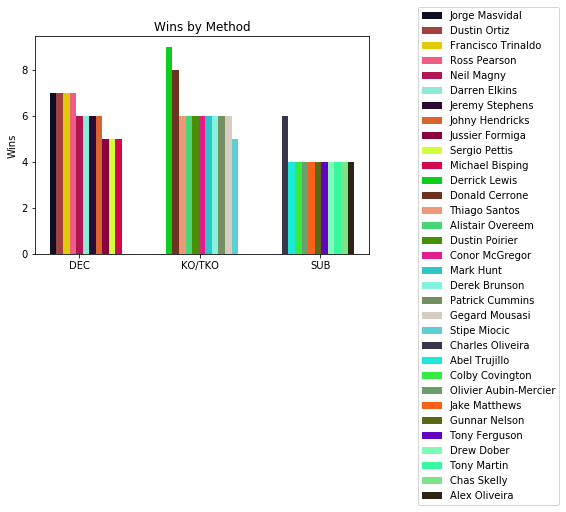

In [4]:
import matplotlib.pyplot as plt
import random
          
# Use matplotlib to create a bar graph with the three win type categories            
ind = np.arange(len(win_types.keys()))  # the x locations for the groups
# The width of the bars
width = .15  
# Space between bars to be incremented
space = 0

fig, ax = plt.subplots()
# Loop through all the fighters and create bar sets for them
for fighter in all_fighters:  
    # Create some random colors
    r = int(random.random() * 256) / 256
    g = int(random.random() * 256) / 256
    b = int(random.random() * 256) / 256    
    # Increment the space on x to set a bar
    space += .15
    # Create a bar set for the fighter
    bars = ax.bar(ind + space, all_fighters[fighter], width, color=(r,g,b), label=fighter) 

# Add some text for labels, title.
ax.set_ylabel("Wins")
ax.set_title("Wins by Method")
#Set the x ticks positions, have to do this statically
xticks = [.75, 3.5, 6.25]
ax.set_xticks(xticks)
# Set the xticks labels
xticklabels = [key for key in win_types.keys()]              
ax.set_xticklabels(xticklabels)
# Move the legend, otherwise it will overlap the graph
ax.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
# Show / print the graph
plt.show()